# PROJECT SUBMISSION BY SUJATHA PATEL

Problem Statement: Concrete Strength Prediction
Objective
To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.

Resources Available
The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/. The same has been shared along with the course content.

Steps and Tasks:
 Exploratory data quality report reflecting the following:
1. Univariate analysis – data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers, duplicates (10 Marks)
2. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. (10 marks)

3. Feature Engineering techniques (10 marks)
a. Identify opportunities (if any) to extract a new feature from existing features, drop a feature (if required)
b. Get data model ready and do a train test split.
c. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree.
 Creating the model and tuning it
1. Algorithms that you think will be suitable for this project. Use Kfold Cross Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics.
(at least 3 algorithms, one bagging and one boosting based algorithms has to be there). (15 marks)
2. Techniques employed to squeeze that extra performance out of the model without making it over fit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)

Attribute Information:
Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.
Name -- Data Type -- Measurement -- Description
<br>  Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable
<br>  Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable
<br>  Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable
<br>  Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable
<br>  Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable
<br>  Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable
<br>  Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable
<br>  Age(age) -- quantitative -- Day (1~365) -- Input Variable
<br>  Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable

In [1]:
#!pip install tensorflow

In [2]:
#!pip install catboost

In [3]:
#!pip install eli5

In [4]:
# available matplotlib - ['seaborn-deep','seaborn-muted','bmh','seaborn-white','dark_background','seaborn-notebook','seaborn-darkgrid','grayscale','seaborn-paper','seaborn-talk','seaborn-bright','classic','seaborn-colorblind','seaborn-ticks','ggplot','seaborn','_classic_test','fivethirtyeight','seaborn-dark-palette','seaborn-dark','seaborn-whitegrid','seaborn-pastel','seaborn-poster']

# Imports
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats; from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')
from collections import OrderedDict
%matplotlib inline

# Checking Leverage and Influence Points
from statsmodels.graphics.regressionplots import *
import statsmodels.stats.stattools as stools
import statsmodels.formula.api as smf
import statsmodels.stats as stats
import scipy.stats as scipystats
import statsmodels.api as sm

# Checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# Cluster analysis
from sklearn.cluster import KMeans

# Feature importance
import eli5
from eli5.sklearn import PermutationImportance

# Modelling
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.svm import SVR

# Metrics
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.utils import resample

# Display settings
pd.options.display.max_rows = 400
pd.options.display.max_columns = 100
pd.options.display.float_format = "{:.2f}".format

# Checking if GPU is found
import tensorflow as tf

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

random_state = 2020
np.random.seed(random_state)

## Reading the data as dataframe and print the first five rows

In [5]:
# Reading the data as dataframe and print the first five rows
concrete = pd.read_csv('concrete.csv')
concrete.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0  141.30 212.00   0.00 203.50          0.00     971.80   748.50   28   
1  168.90  42.20 124.30 158.30         10.80    1080.80   796.20   14   
2  250.00   0.00  95.70 187.40          5.50     956.90   861.20   28   
3  266.00 114.00   0.00 228.00          0.00     932.00   670.00   28   
4  154.80 183.40   0.00 193.30          9.10    1047.40   696.70   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

## Univariate Analysis

In [6]:
# Get info of the dataframe columns
concrete.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [7]:
# Get no. of rows and columns
concrete.shape

(1030, 9)

In [8]:
# Describe concrete dataset
concrete.describe()

cement    slag     ash   water  superplastic  coarseagg  fineagg  \
count 1030.00 1030.00 1030.00 1030.00       1030.00    1030.00  1030.00   
mean   281.17   73.90   54.19  181.57          6.20     972.92   773.58   
std    104.51   86.28   64.00   21.35          5.97      77.75    80.18   
min    102.00    0.00    0.00  121.80          0.00     801.00   594.00   
25%    192.38    0.00    0.00  164.90          0.00     932.00   730.95   
50%    272.90   22.00    0.00  185.00          6.40     968.00   779.50   
75%    350.00  142.95  118.30  192.00         10.20    1029.40   824.00   
max    540.00  359.40  200.10  247.00         32.20    1145.00   992.60   

          age  strength  
count 1030.00   1030.00  
mean    45.66     35.82  
std     63.17     16.71  
min      1.00      2.33  
25%      7.00     23.71  
50%     28.00     34.45  
75%     56.00     46.14  
max    365.00     82.60

In [9]:
# Checking any null values
concrete.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

#### Observation 1 - Dataset shape 
Dataset has 1030 rows and 9 columns, with no missing values.

#### Observation 2 - Information on the type of variable
All features are of numerical types. strength is a target variable (continuous). age is a discrete feature whereas rest of them are continuous.

In [10]:
# customized function to find the skewness, outliers of all columns
def cdescribe(df):
  results = []
  for col in df.select_dtypes(include = ['float64', 'int64']).columns.tolist():
    stats = OrderedDict({'': col, 
                         'Count': df[col].count(), 
                         'Type': df[col].dtype, 
                         'Mean': round(df[col].mean(), 2), 
                         'StdDev': round(df[col].std(), 2), 
                         'Variance': round(df[col].var(), 2), 
                         'Minimum': round(df[col].min(), 2), 
                         'Q1': round(df[col].quantile(0.25), 2), 
                         'Median': round(df[col].median(), 2), 
                         'Q3': round(df[col].quantile(0.75), 2), 
                         'Maximum': round(df[col].max(), 2),
                         'Range': round(df[col].max(), 2)-round(df[col].min(), 2), 
                         'IQR': round(df[col].quantile(0.75), 2)-round(df[col].quantile(0.25), 2),
                         'Kurtosis': round(df[col].kurt(), 2), 
                         'Skewness': round(df[col].skew(), 2), 
                         'MeanAbsDev': round(df[col].mad(), 2)})
    if df[col].skew() < -1:
      if df[col].median() < df[col].mean(): ske = 'Highly Skewed (Right)'      
      else: ske = 'Highly Skewed (Left)'
    elif -1 <= df[col].skew() <= -0.5:
      if df[col].median() < df[col].mean(): ske = 'Moderately Skewed (Right)'
      else: ske = 'Moderately Skewed (Left)'
    elif -0.5 < df[col].skew() <= 0:  
      if df[col].median() < df[col].mean(): ske = 'Fairly Symmetrical (Right)'
      else: ske = 'Fairly Symmetrical (Left)' 
    elif 0 < df[col].skew() <= 0.5:
      if df[col].median() < df[col].mean(): ske = 'Fairly Symmetrical (Right)'
      else: ske = 'Fairly Symmetrical (Left)'
    elif 0.5 < df[col].skew() <= 1:
      if df[col].median() < df[col].mean(): ske = 'Moderately Skewed (Right)'
      else: ske = 'Moderately Skewed (Left)'
    elif df[col].skew() > 1:
      if df[col].median() < df[col].mean(): ske = 'Highly Skewed (Right)'
      else: ske = 'Highly Skewed (Left)'
    else:
      ske = 'Error'
    stats['SkewnessComment'] = ske
    upper_lim, lower_lim = stats['Q3'] + (1.5 * stats['IQR']), stats['Q1'] - (1.5 * stats['IQR'])
    if len([x for x in df[col] if x < lower_lim or x > upper_lim])>1:
      out = 'HasOutliers'
    else:
      out = 'NoOutliers'
    stats['OutliersComment'] = out
    results.append(stats)
    if df[col].median() > df[col].mean():
       med_mean = "more than"
    elif df[col].median() < df[col].mean():
       med_mean = "less than"
    else:
       med_mean = "same as"

    # Printi the descriptive statistics report for all the columns in concrete dataset
    print(f'\n{col} - Data ranges between {round(df[col].min(),2)} to {round(df[col].max(),2)}, while 25th and 75th percentile is spread between {round(df[col].quantile(0.25),2)} to {round(df[col].quantile(0.75),2)}. Median {round(df[col].median(),2)} is {med_mean} than Mean {round(df[col].mean(),2)} which means cement is {ske}. Column has {out}.')
  
  describe = pd.DataFrame(results).set_index('')
              
  return display(describe.T)

#### Observation 3 - Descriptive statistics

In [11]:
cdescribe(concrete)


cement - Data ranges between 102.0 to 540.0, while 25th and 75th percentile is spread between 192.38 to 350.0. Median 272.9 is less than than Mean 281.17 which means cement is Moderately Skewed (Right). Column has NoOutliers.

slag - Data ranges between 0.0 to 359.4, while 25th and 75th percentile is spread between 0.0 to 142.95. Median 22.0 is less than than Mean 73.9 which means cement is Moderately Skewed (Right). Column has HasOutliers.

ash - Data ranges between 0.0 to 200.1, while 25th and 75th percentile is spread between 0.0 to 118.3. Median 0.0 is less than than Mean 54.19 which means cement is Moderately Skewed (Right). Column has NoOutliers.

water - Data ranges between 121.8 to 247.0, while 25th and 75th percentile is spread between 164.9 to 192.0. Median 185.0 is more than than Mean 181.57 which means cement is Fairly Symmetrical (Left). Column has HasOutliers.

superplastic - Data ranges between 0.0 to 32.2, while 25th and 75th percentile is spread between 0.0 to 10.2. M

cement                       slag  \
Count                                 1030                       1030   
Type                               float64                    float64   
Mean                                281.17                      73.90   
StdDev                              104.51                      86.28   
Variance                          10921.58                    7444.12   
Minimum                             102.00                       0.00   
Q1                                  192.38                       0.00   
Median                              272.90                      22.00   
Q3                                  350.00                     142.95   
Maximum                             540.00                     359.40   
Range                               438.00                     359.40   
IQR                                 157.62                     142.95   
Kurtosis                             -0.52                      -0.51   
Skewness                              0.51                       0.80   
MeanAbsDev                           86.78                      76.93   
SkewnessComment  Moderately Skewed (Right)  Moderately Skewed (Right)   
OutliersComment                 NoOutliers                HasOutliers   

                                       ash                      water  \
Count                                 1030                       1030   
Type                               float64                    float64   
Mean                                 54.19                     181.57   
StdDev                               64.00                      21.35   
Variance                           4095.62                     456.00   
Minimum                               0.00                     121.80   
Q1                                    0.00                     164.90   
Median                                0.00                     185.00   
Q3                                  118.30                     192.00   
Maximum                             200.10                     247.00   
Range                               200.10                     125.20   
IQR                                 118.30                      27.10   
Kurtosis                             -1.33                       0.12   
Skewness                              0.54                       0.07   
MeanAbsDev                           60.42                      16.92   
SkewnessComment  Moderately Skewed (Right)  Fairly Symmetrical (Left)   
OutliersComment                 NoOutliers                HasOutliers   

                             superplastic                   coarseagg  \
Count                                1030                        1030   
Type                              float64                     float64   
Mean                                 6.20                      972.92   
StdDev                               5.97                       77.75   
Variance                            35.69                     6045.68   
Minimum                              0.00                      801.00   
Q1                                   0.00                      932.00   
Median                               6.40                      968.00   
Q3                                  10.20                     1029.40   
Maximum                             32.20                     1145.00   
Range                               32.20                      344.00   
IQR                                 10.20                       97.40   
Kurtosis                             1.41                       -0.60   
Skewness                             0.91                       -0.04   
MeanAbsDev                           4.92                       62.80   
SkewnessComment  Moderately Skewed (Left)  Fairly Symmetrical (Right)   
OutliersComment               HasOutliers                  NoOutliers   

                                   fineagg                    age  \
Count                 

Checking Outliers using boxplot
------------------------------------------------------------------------------------------------------------------------


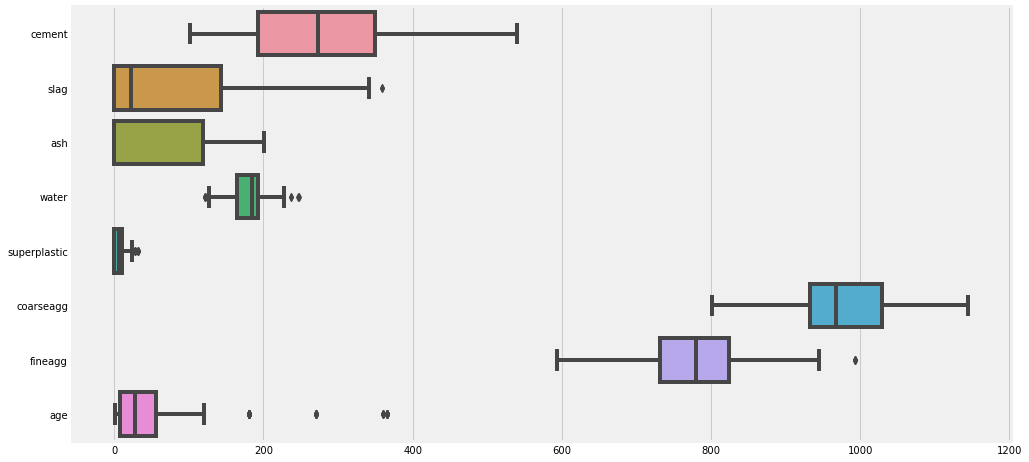

In [12]:
print('Checking Outliers using boxplot'); print('--'*60)

fig = plt.figure(figsize = (15, 8))
ax = sns.boxplot(data = concrete.iloc[:, 0:-1], orient = 'h')

In [13]:
def bdplots(df, col):
    f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7))
    
    # Boxplot to check outliers
    sns.boxplot(x = col, data = df, ax = ax1, orient = 'v', color = 'lightblue')
    
    # Distribution plot with outliers
    sns.distplot(df[col], ax = ax2, color = 'teal', fit = norm, rug = True).set_title(f'{col} with outliers')
    ax2.axvline(df[col].mean(), color = 'r', linestyle = '--', label = 'Mean', linewidth = 1.2)
    ax2.axvline(df[col].median(), color = 'g', linestyle = '--', label = 'Median', linewidth = 1.2)
    ax2.axvline(df[col].mode()[0], color = 'b', linestyle = '--', label = 'Mode', linewidth = 1.2); ax2.legend(loc = 'best')
    
    # Removing outliers, but in a new dataframe
    upperbound, lowerbound = np.percentile(df[col], [1, 99])
    y = pd.DataFrame(np.clip(df[col], upperbound, lowerbound))
    
    # Distribution plot without outliers
    sns.distplot(y[col], ax = ax3, color = 'tab:orange', fit = norm, rug = True).set_title(f'{col} without outliers')
    ax3.axvline(y[col].mean(), color = 'r', linestyle = '--', label = 'Mean', linewidth = 1.2)
    ax3.axvline(y[col].median(), color = 'g', linestyle = '--', label = 'Median', linewidth = 1.2)
    ax3.axvline(y[col].mode()[0], color = 'b', linestyle = '--', label = 'Mode', linewidth = 1.2); ax3.legend(loc = 'best')
    
    kwargs = {'fontsize':14, 'color':'blue'}
    ax1.set_title(col + ' Boxplot Analysis', **kwargs)
    ax1.set_xlabel('Box', **kwargs)
    ax1.set_ylabel(col + ' Values', **kwargs)

    return plt.show()

Boxplot, distribution of columns with and without outliers
------------------------------------------------------------------------------------------------------------------------
Cement column 
Number of rows with outliers: 0


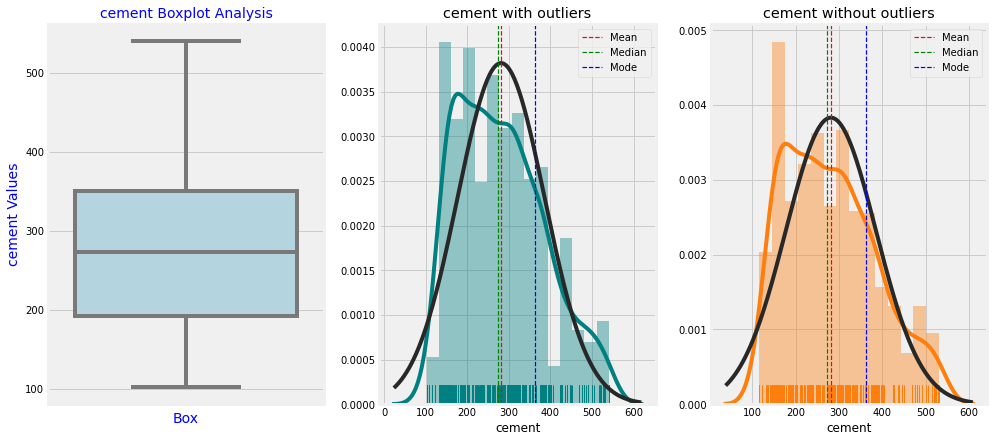

Slag column 
Number of rows with outliers: 2


cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
918  239.60 359.40 0.00 185.70          0.00     941.60   664.30   28   
990  239.60 359.40 0.00 185.70          0.00     941.60   664.30    7   

     strength  
918     39.44  
990     25.42

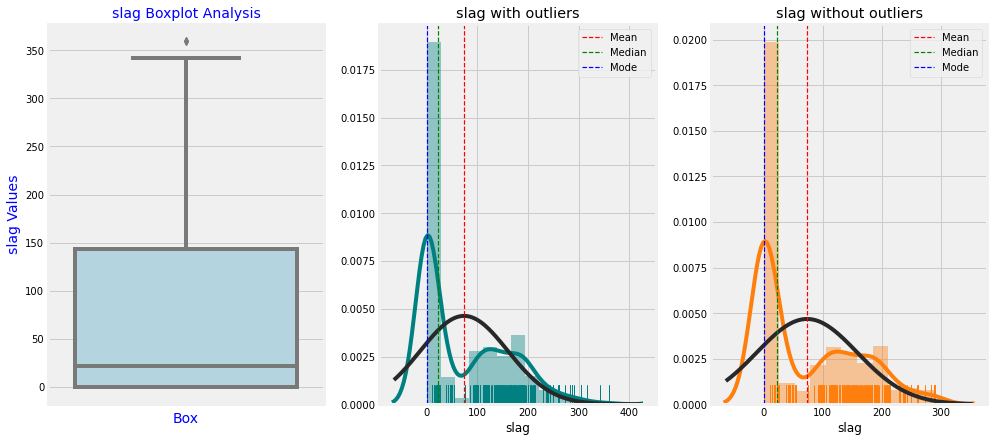

Ash column 
Number of rows with outliers: 0


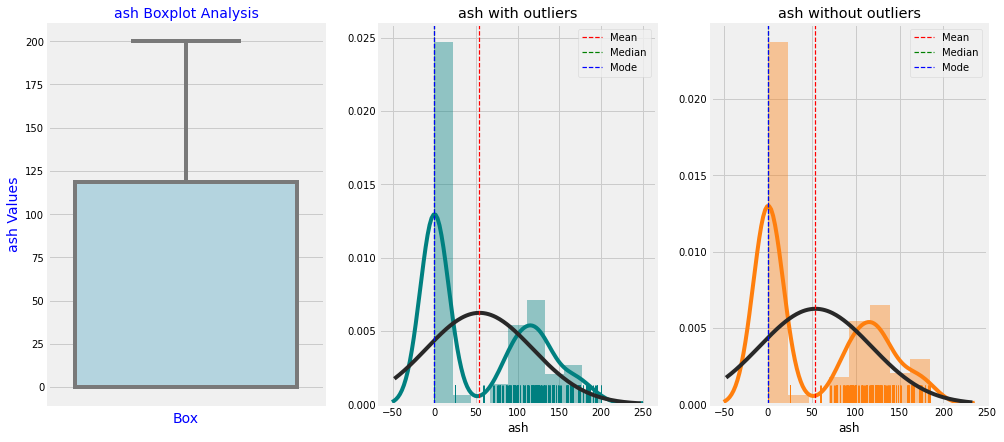

Water column 
Number of rows with outliers: 9


cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
66   237.00  92.00  71.00 247.00          6.00     853.00   695.00   28   
263  236.90  91.70  71.50 246.90          6.00     852.90   695.40   28   
432  168.00  42.10 163.80 121.80          5.70    1058.70   780.10   28   
462  168.00  42.10 163.80 121.80          5.70    1058.70   780.10  100   
587  168.00  42.10 163.80 121.80          5.70    1058.70   780.10    3   
740  140.00 164.00 128.00 237.00          6.00     869.00   656.00   28   
789  168.00  42.10 163.80 121.80          5.70    1058.70   780.10   56   
826  139.70 163.90 127.70 236.70          5.80     868.60   655.60   28   
914  168.00  42.10 163.80 121.80          5.70    1058.70   780.10   14   

     strength  
66      28.63  
263     28.63  
432     24.24  
462     39.23  
587      7.75  
740     35.23  
789     32.85  
826     35.23  
914     17.82

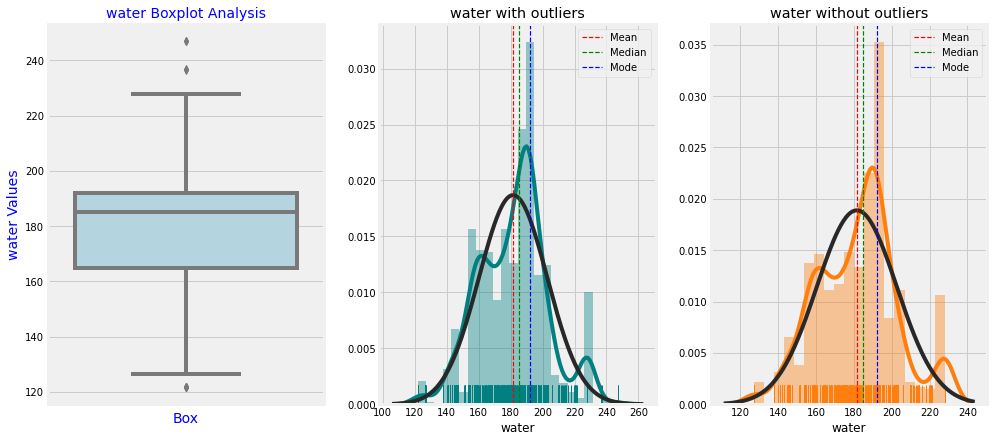

Superplastic column 
Number of rows with outliers: 10


cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
44    531.30   0.00 0.00 141.80         28.20     852.10   893.70   91   
156   531.30   0.00 0.00 141.80         28.20     852.10   893.70   28   
232   469.00 117.20 0.00 137.80         32.20     852.10   840.50   56   
292   469.00 117.20 0.00 137.80         32.20     852.10   840.50   91   
538   531.30   0.00 0.00 141.80         28.20     852.10   893.70    7   
744   469.00 117.20 0.00 137.80         32.20     852.10   840.50    7   
816   469.00 117.20 0.00 137.80         32.20     852.10   840.50   28   
838   531.30   0.00 0.00 141.80         28.20     852.10   893.70   56   
955   469.00 117.20 0.00 137.80         32.20     852.10   840.50    3   
1026  531.30   0.00 0.00 141.80         28.20     852.10   893.70    3   

      strength  
44       59.20  
156      56.40  
232      69.30  
292      70.70  
538      46.90  
744      54.90  
816      66.90  
838      58.80  
955      40.20  
1026     41.30

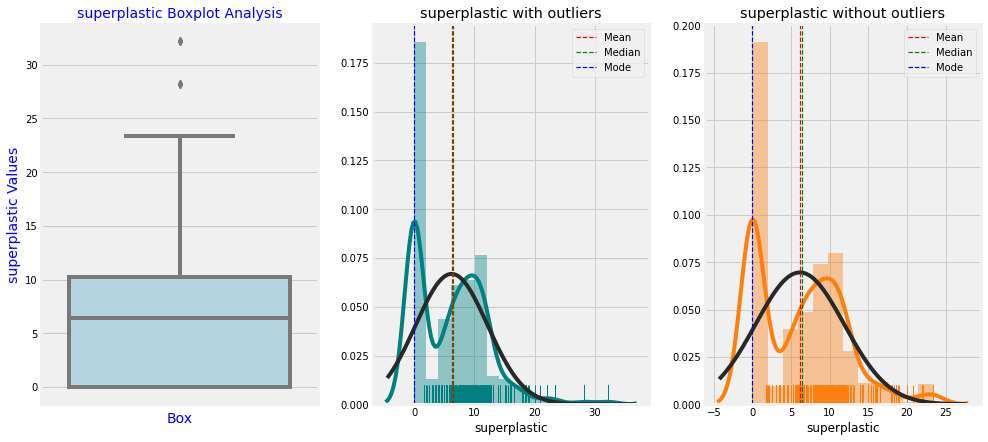

Coarseagg column 
Number of rows with outliers: 0


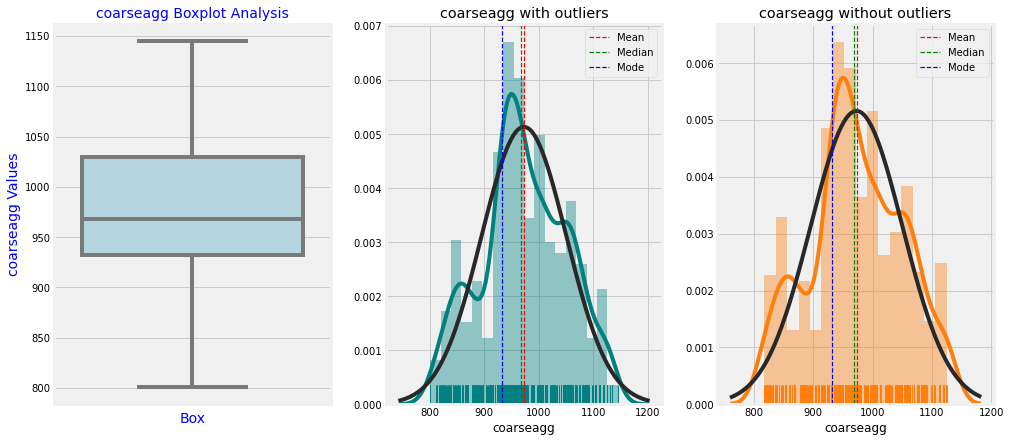

Fineagg column 
Number of rows with outliers: 5


cement  slag  ash  water  superplastic  coarseagg  fineagg  age  strength
129  375.00 93.80 0.00 126.60         23.40     852.10   992.60   91     62.50
447  375.00 93.80 0.00 126.60         23.40     852.10   992.60    7     45.70
504  375.00 93.80 0.00 126.60         23.40     852.10   992.60    3     29.00
584  375.00 93.80 0.00 126.60         23.40     852.10   992.60   56     60.20
857  375.00 93.80 0.00 126.60         23.40     852.10   992.60   28     56.70

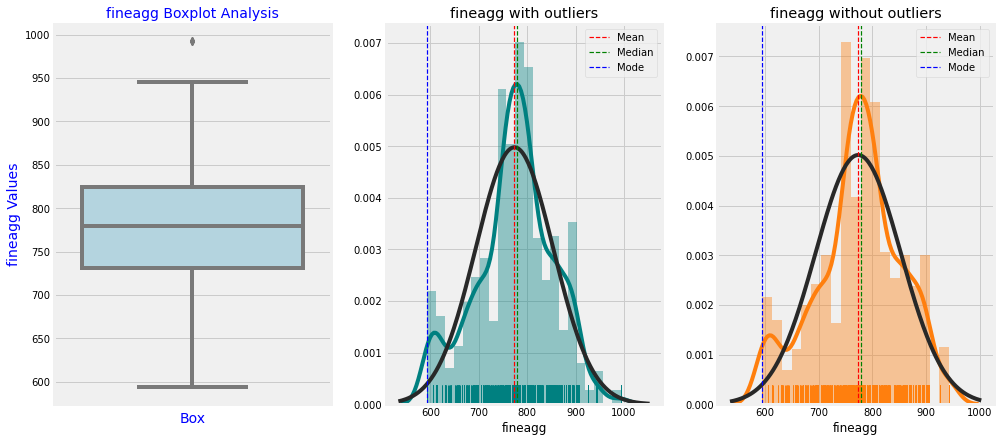

Age column 
Number of rows with outliers: 59


cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
51    331.00   0.00 0.00 192.00          0.00     978.00   825.00  180   
64    332.50 142.50 0.00 228.00          0.00     932.00   594.00  365   
93    427.50  47.50 0.00 228.00          0.00     932.00   594.00  180   
99    237.50 237.50 0.00 228.00          0.00     932.00   594.00  180   
103   380.00   0.00 0.00 228.00          0.00     932.00   670.00  180   
133   236.00   0.00 0.00 193.00          0.00     968.00   885.00  365   
144   302.00   0.00 0.00 203.00          0.00     974.00   817.00  180   
149   380.00  95.00 0.00 228.00          0.00     932.00   594.00  270   
152   322.00   0.00 0.00 203.00          0.00     974.00   800.00  180   
157   198.60 132.40 0.00 192.00          0.00     978.40   825.50  360   
159   304.00  76.00 0.00 228.00          0.00     932.00   670.00  365   
198   266.00 114.00 0.00 228.00          0.00     932.00   670.00  365   
199   277.00   0.00 0.00 191.00          0.00     968.00   856.00  180   
207   190.00 190.00 0.00 228.00          0.00     932.00   670.00  180   
256   525.00   0.00 0.00 189.00          0.00    1125.00   613.00  270   
262   266.00 114.00 0.00 228.00          0.00     932.00   670.00  270   
270   500.00   0.00 0.00 200.00          0.00    1125.00   613.00  270   
297   475.00   0.00 0.00 228.00          0.00     932.00   594.00  270   
302   342.00  38.00 0.00 228.00          0.00     932.00   670.00  180   
312   236.00   0.00 0.00 193.00          0.00     968.00   885.00  180   
313   540.00   0.00 0.00 173.00          0.00    1125.00   613.00  270   
323   139.60 209.40 0.00 192.00          0.00    1047.00   806.90  360   
359   475.00   0.00 0.00 228.00          0.00     932.00   594.00  180   
361   277.00   0.00 0.00 191.00          0.00     968.00   856.00  360   
370   266.00 114.00 0.00 228.00          0.00     932.00   670.00  180   
393   342.00  38.00 0.00 228.00          0.00     932.00   670.00  365   
448   331.00   0.00 0.00 192.00          0.00     978.00   825.00  360   
465   427.50  47.50 0.00 228.00          0.00     932.00   594.00  365   
484   237.50 237.50 0.00 228.00          0.00     932.00   594.00  365   
539   304.00  76.00 0.00 228.00          0.00     932.00   670.00  180   
570   190.00 190.00 0.00 228.00          0.00     932.00   670.00  270   
581   525.00   0.00 0.00 189.00          0.00    1125.00   613.00  180   
594   339.00   0.00 0.00 197.00          0.00     968.00   781.00  180   
601   339.00   0.00 0.00 197.00          0.00     968.00   781.00  365   
620   332.50 142.50 0.00 228.00          0.00     932.00   594.00  180   
622   380.00  95.00 0.00 228.00          0.00     932.00   594.00  180   
623   380.00   0.00 0.00 228.00          0.00     932.00   670.00  270   
632   304.00  76.00 0.00 228.00          0.00     932.00   670.00  270   
642   198.60 132.40 0.00 192.00          0.00     978.40   825.50  180   
696   307.00   0.00 0.00 193.00          0.00     968.00   812.00  180   
713   190.00 190.00 0.00 228.00          0.00     932.00   670.00  365   
720   380.00  95.00 0.00 228.00          0.00     932.00   594.00  365   
721   500.00   0.00 0.00 200.00          0.00    1125.00   613.00  180   
754   254.00   0.00 0.00 198.00          0.00     968.00   863.00  365   
755   349.00   0.00 0.00 192.00          0.00    1047.00   806.00  360   
776   540.00   0.00 0.00 173.00          0.00    1125.00   613.00  180   
850   427.50  47.50 0.00 228.00          0.00     932.00   594.00  270   
861   310.00   0.00 0.00 192.00          0.00     970.00   850.00  180   
878   237.50 237.50 0.00 228.00          0.00     932.00   594.00  270   
900   254.00   0.00 0.00 198.00          0.00     968.00   863.00  180   
901   475.00   0.00 0.00 228.00          0.00     932.00   594.00  365   
919   310.00   0.00 0.00 192.00          0.00     970.00   850.00  360   
951   332.50 142.50 0.00 228.00          0.00     932.00   594.00  270   
957   307.

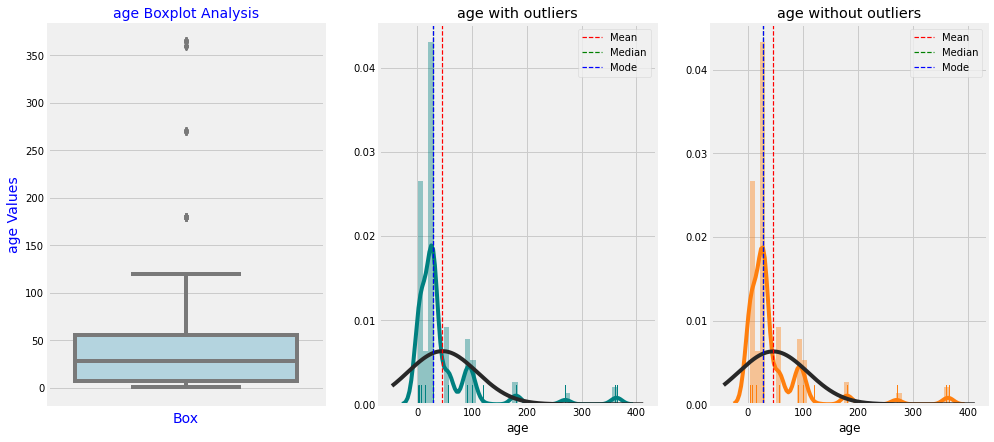

In [14]:
print('Boxplot, distribution of columns with and without outliers'); print('--'*60)
columns = list(concrete.columns)[:-1]
for i in columns:
    Q3 = concrete[i].quantile(0.75) 
    Q1 = concrete[i].quantile(0.25)
    IQR = Q3 - Q1

    no_outlier = len(concrete.loc[(concrete[i] < (Q1 - 1.5 * IQR)) | (concrete[i] > (Q3 + 1.5 * IQR))])
    print(f'{i.capitalize()} column \nNumber of rows with outliers: {no_outlier}')
    
    # print the outlier rows
    if (no_outlier > 0):
        display(concrete.loc[(concrete[i] < (Q1 - 1.5 * IQR)) | (concrete[i] > (Q3 + 1.5 * IQR))].head(no_outlier)) 
    bdplots(concrete, i)

del i, Q1, Q3, IQR, columns, no_outlier

In [15]:
# Outliers removal
def replace_outliers(df, col, method = 'quantile', strategy = 'median', drop = True):
    if method == 'quantile':
        Q3, Q2, Q1 = df[col].quantile([0.75, 0.50, 0.25])
        IQR = Q3 - Q1
        upper_lim = Q3 + (1.5 * IQR)
        lower_lim = Q1 - (1.5 * IQR)
        print(f'Outliers for {col} are: {sorted([x for x in df[col] if x < lower_lim or x > upper_lim])}\n')
        if strategy == 'median':
            df.loc[(df[col] < lower_lim) | (df[col] > upper_lim), col] = Q2
        else:
            df.loc[(df[col] < lower_lim) | (df[col] > upper_lim), col] = df[col].mean()
    elif method == 'stddev':
        col_mean, col_std, Q2 = df[col].mean(), df[col].std(), df[col].median()
        cut_off = col_std * 3
        lower_lim, upper_lim = col_mean - cut_off, col_mean + cut_off
        print(f'Outliers for {col} are: {sorted([x for x in df[col] if x < lower_lim or x > upper_lim])}\n')
        if strategy == 'median':
            df.loc[(df[col] < lower_lim) | (df[col] > upper_lim), col] = Q2
        else:
            df.loc[(df[col] < lower_lim) | (df[col] > upper_lim), col] = col_mean
    else:
      print('Please pass the correct method, strategy or drop criteria')

In [16]:
# Replacing outliers with mean values with outliers
print('Replacing outliers with mean values using quantile method'); print('--'*62)

concrete1 = concrete.copy(deep = True)
outliers_cols = ['slag', 'water', 'superplastic', 'fineagg', 'age']

for col in outliers_cols:
    replace_outliers(concrete1, col, method = 'quantile', strategy = 'mean')
   
print('\nColumn for which outliers where replaced with mean using quantile method: \n', outliers_cols)

Replacing outliers with mean values using quantile method
----------------------------------------------------------------------------------------------------------------------------
Outliers for slag are: [359.4, 359.4]

Outliers for water are: [121.8, 121.8, 121.8, 121.8, 121.8, 236.7, 237.0, 246.9, 247.0]

Outliers for superplastic are: [28.2, 28.2, 28.2, 28.2, 28.2, 32.2, 32.2, 32.2, 32.2, 32.2]

Outliers for fineagg are: [992.6, 992.6, 992.6, 992.6, 992.6]

Outliers for age are: [180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 360, 360, 360, 360, 360, 360, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365]


Column for which outliers where replaced with mean using quantile method: 
 ['slag', 'water', 'superplastic', 'fineagg', 'age']


In [17]:
print('With Outliers'); print('--'*62); display(concrete[outliers_cols].describe().T)
print('\nWihtout Outliers'); print('--'*62); display(concrete1[outliers_cols].describe().T)

With Outliers
----------------------------------------------------------------------------------------------------------------------------


count   mean   std    min    25%    50%    75%    max
slag         1030.00  73.90 86.28   0.00   0.00  22.00 142.95 359.40
water        1030.00 181.57 21.35 121.80 164.90 185.00 192.00 247.00
superplastic 1030.00   6.20  5.97   0.00   0.00   6.40  10.20  32.20
fineagg      1030.00 773.58 80.18 594.00 730.95 779.50 824.00 992.60
age          1030.00  45.66 63.17   1.00   7.00  28.00  56.00 365.00


Wihtout Outliers
----------------------------------------------------------------------------------------------------------------------------


count   mean   std    min    25%    50%    75%    max
slag         1030.00  73.34 85.35   0.00   0.00  22.00 142.73 342.10
water        1030.00 181.62 20.60 126.60 164.90 185.00 192.00 228.00
superplastic 1030.00   5.97  5.48   0.00   0.00   6.20  10.07  23.40
fineagg      1030.00 772.52 78.70 594.00 730.95 778.90 822.20 945.00
age          1030.00  33.27 27.95   1.00   7.00  28.00  45.66 120.00

#### Observation 4 - After imputation
A quick observation after imputating the missing values: medians remain unchanged while mean changes slightly not significantly. Type of skewness remain unchanged.

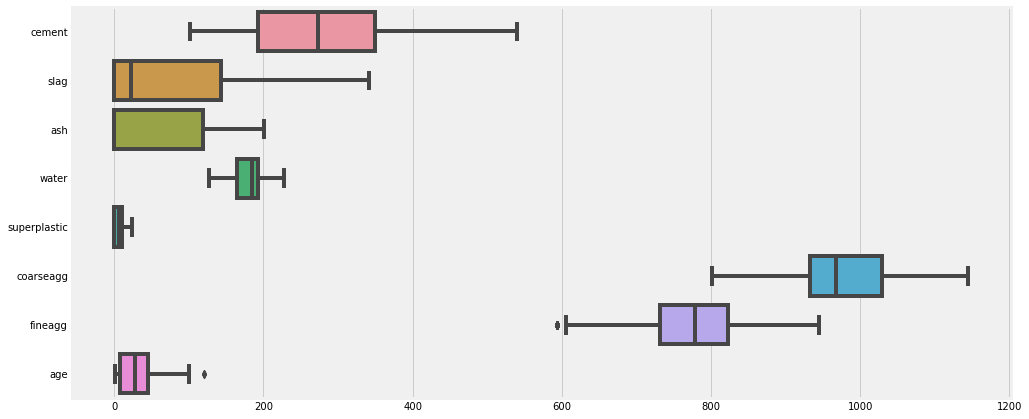

In [18]:
# Cheking the outliers graphically after removal
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(data = concrete1.iloc[:, 0:-1], orient = 'h')

## Bi-Variate / Multivate Analysis

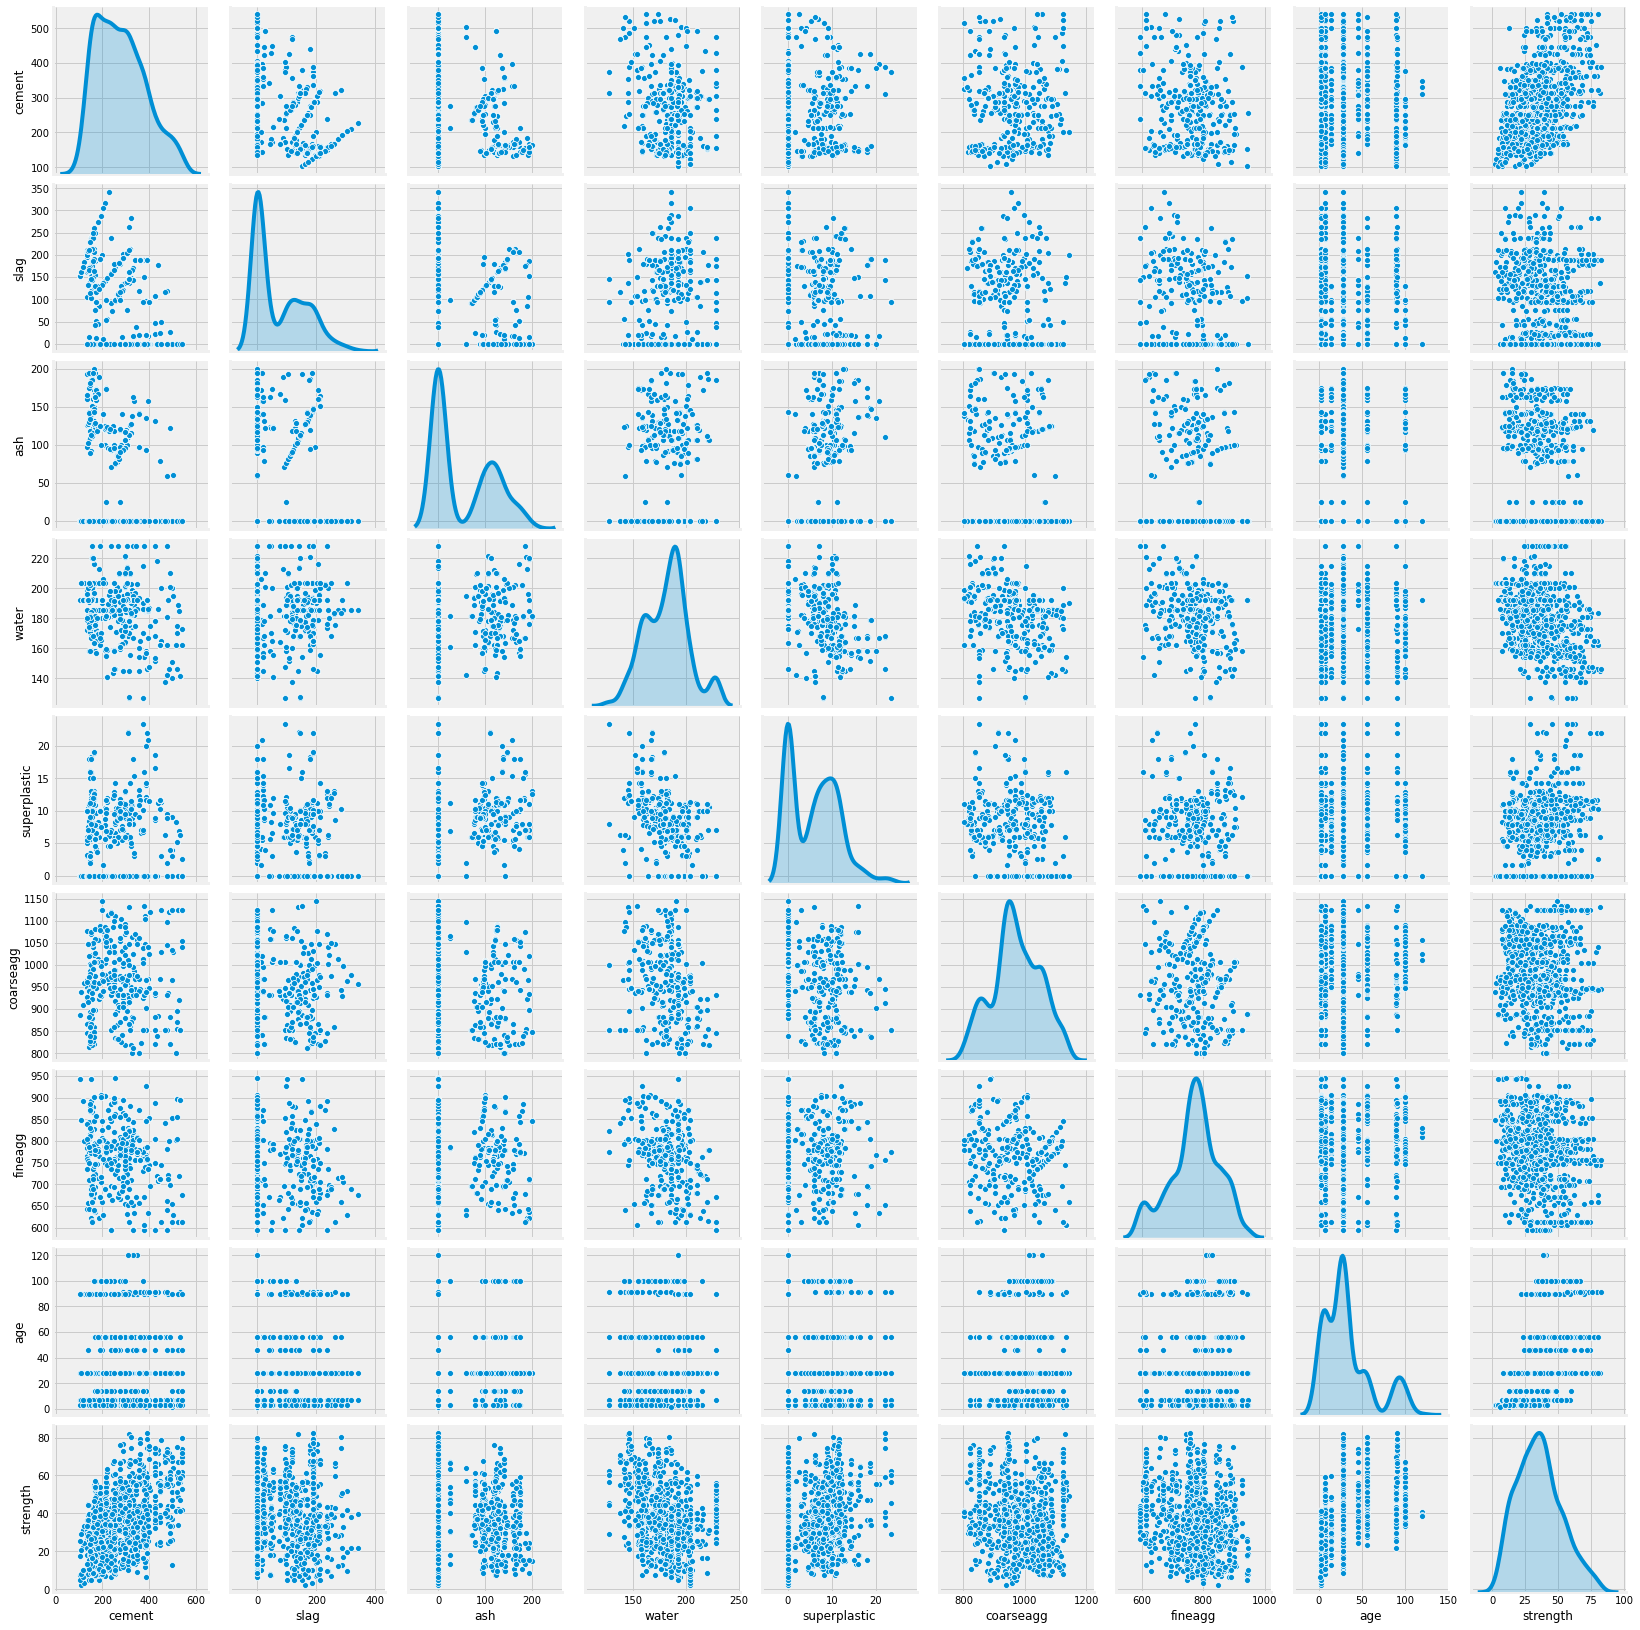

In [19]:
sns.pairplot(concrete1, diag_kind = 'kde')

#### Observation 5 - Pairplot comments
Cement and strength have a linear relationship.
<br>Column that have bi/multimodal distributions are slag, ash and superplastic.

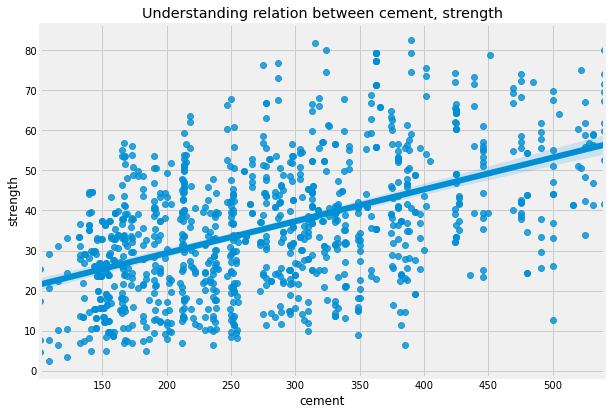

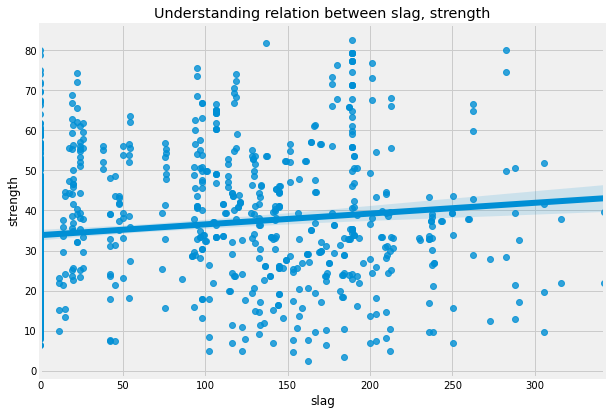

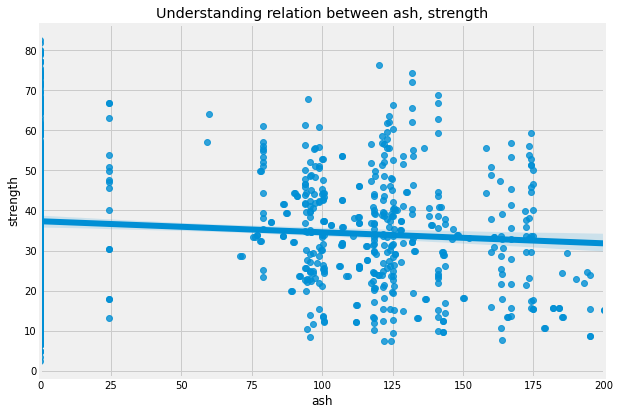

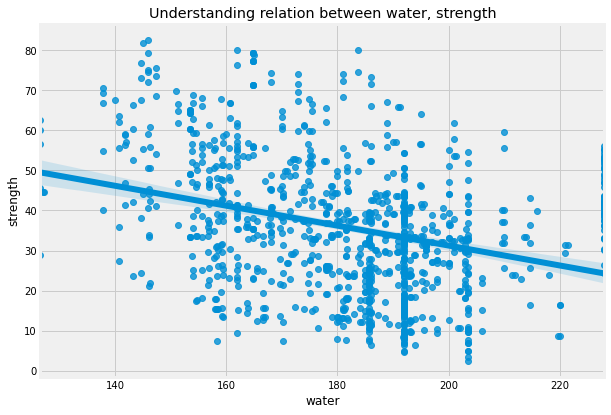

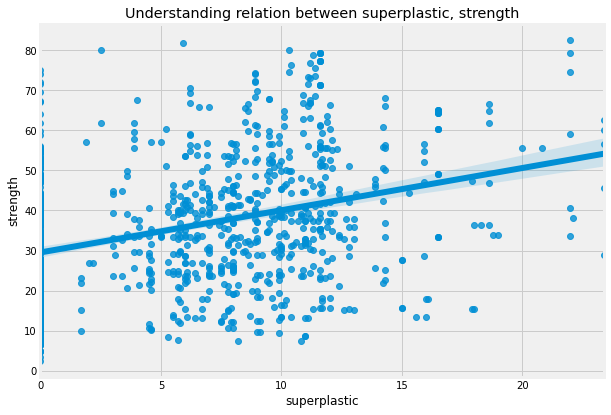

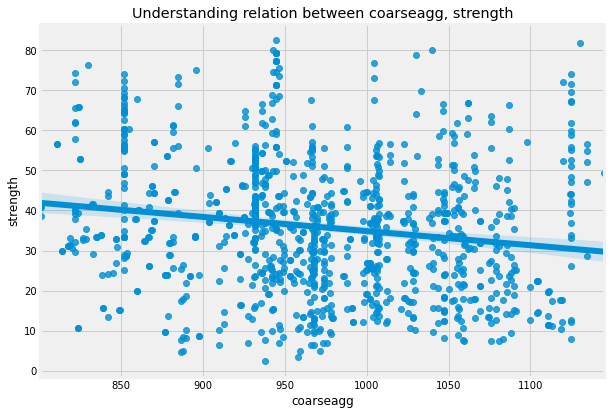

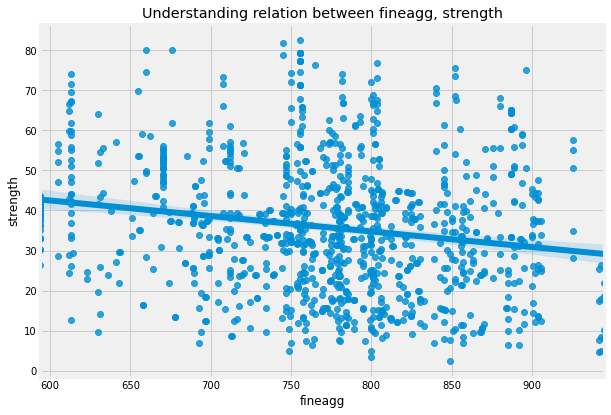

In [20]:
for col in list(concrete1.columns)[:-2]:
    fig, ax1 = plt.subplots(figsize = (9, 6.5), ncols = 1, sharex = False)
    sns.regplot(x = concrete1[col], y = concrete1['strength'], ax = ax1).\
    set_title(f'Understanding relation between {col}, strength')
    

### Leverage Analysis
Reference for carrying out this analysis: https://songhuiming.github.io/pages/2016/12/31/linear-regression-in-python-chapter-2/     

Leverage: An observation with an extreme value on a predictor variable is called a point with high leverage. Leverage is a measure of how far an observation deviates from the mean of that variable. These leverage points can have an effect on the estimate of regression coefficients.

Influence: An observation is said to be influential if removing the observation substantially changes the estimate of coefficients. Influence can be thought of as the product of leverage and outlierness.

### Multiple Regression Residual Analysis and Outliers
Reference- https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-multiple-regression/mlr-residual-analysis-and-outliers.html#:~:text=A%20studentized%20residual%20is%20calculated,estimate%20of%20its%20standard%20deviation.&text=For%20this%20reason%2C%20studentized%20residuals,assessing%20the%20equal%20variance%20assumption.
    
 A studentized residual is calculated by dividing the residual by an estimate of its standard deviation. The standard deviation for each residual is computed with the observation excluded. For this reason, studentized residuals are sometimes referred to as externally studentized residuals.

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     365.7
Date:                Thu, 27 Aug 2020   Prob (F-statistic):          1.53e-293
Time:                        11:48:44   Log-Likelihood:                -3664.9
No. Observations:                1030   AIC:                             7348.
Df Residuals:                    1021   BIC:                             7392.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       32.1465     18.667      1.722   

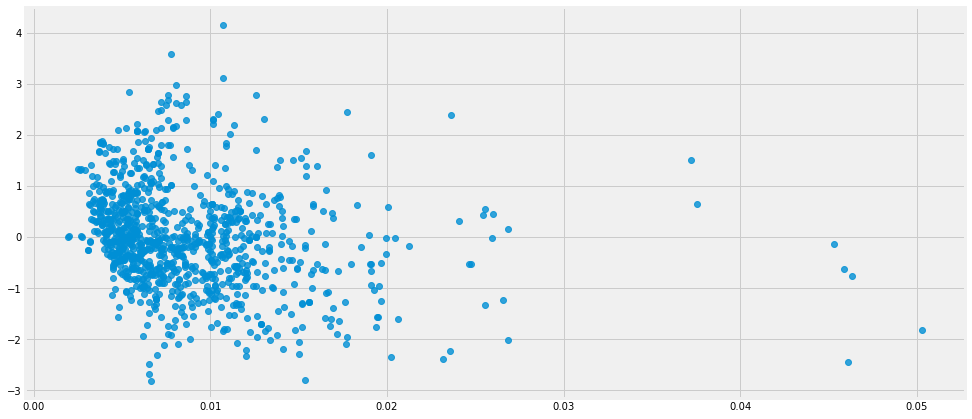

In [21]:
lm = smf.ols(formula = 'strength ~ cement + slag + ash + water + superplastic + coarseagg + fineagg + age', data = concrete1).fit()
print(lm.summary())

influence = lm.get_influence()
resid_student = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

print('\n')
print('Leverage v.s. Studentized Residuals')
fig = plt.figure(figsize = (15, 7.2))
sns.regplot(leverage, lm.resid_pearson,  fit_reg = False)

In [22]:
concrete1_res = pd.concat([pd.Series(cooks, name = 'cooks'), pd.Series(dffits, name = 'dffits'), pd.Series(leverage, name = 'leverage'), pd.Series(resid_student, name = 'resid_student')], axis = 1)
concrete1_res = pd.concat([concrete1, concrete1_res], axis = 1)
concrete1_res.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
0  141.30 212.00   0.00 203.50          0.00     971.80   748.50 28.00   
1  168.90  42.20 124.30 158.30         10.80    1080.80   796.20 14.00   
2  250.00   0.00  95.70 187.40          5.50     956.90   861.20 28.00   
3  266.00 114.00   0.00 228.00          0.00     932.00   670.00 28.00   
4  154.80 183.40   0.00 193.30          9.10    1047.40   696.70 28.00   

   strength  cooks  dffits  leverage  resid_student  
0     29.89   0.00    0.07      0.01           0.86  
1     23.51   0.00   -0.00      0.01          -0.02  
2     29.22   0.00    0.03      0.00           0.48  
3     45.85   0.00    0.21      0.01           2.49  
4     18.29   0.00   -0.10      0.01          -0.96

In [23]:
# Studentized Residual
print('Studentized residuals as a first means for identifying outliers'); print('--'*60)
r = concrete1_res.resid_student
print('-'*30 + ' studentized residual ' + '-'*30)
display(r.describe())
print('\n')

r_sort = concrete1_res.sort_values(by = 'resid_student', ascending = True)
print('-'*30 + ' top 5 most negative residuals ' + '-'*30)
display(r_sort.head())
print('\n')

r_sort = concrete1_res.sort_values(by = 'resid_student', ascending = False)
print('-'*30 + ' top 5 most positive residuals ' + '-'*30)
display(r_sort.head())

Studentized residuals as a first means for identifying outliers
------------------------------------------------------------------------------------------------------------------------
------------------------------ studentized residual ------------------------------


count   1030.00
mean      -0.00
std        1.00
min       -2.83
25%       -0.62
50%       -0.06
75%        0.55
max        4.22
Name: resid_student, dtype: float64



------------------------------ top 5 most negative residuals ------------------------------


cement   slag   ash  water  superplastic  coarseagg  fineagg  age  \
502  500.00   0.00  0.00 200.00          0.00    1125.00   613.00 1.00   
503  362.60 189.00  0.00 164.90         11.60     944.70   755.80 7.00   
786  446.00  24.00 79.00 162.00         11.60     967.00   712.00 3.00   
504  375.00  93.80  0.00 126.60         23.40     852.10   773.58 3.00   
993  446.00  24.00 79.00 162.00         11.60     967.00   712.00 3.00   

     strength  cooks  dffits  leverage  resid_student  
502     12.64   0.01   -0.35      0.02          -2.83  
503     22.90   0.01   -0.23      0.01          -2.83  
786     23.35   0.01   -0.22      0.01          -2.69  
504     29.00   0.03   -0.55      0.05          -2.50  
993     25.02   0.00   -0.20      0.01          -2.50



------------------------------ top 5 most positive residuals ------------------------------


cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
192  315.00 137.00   0.00 145.00          5.90    1130.00   745.00 28.00   
506  451.00   0.00   0.00 165.00         11.30    1030.00   745.00 28.00   
491  275.00 180.00 120.00 162.00         10.40     830.00   765.00 28.00   
713  190.00 190.00   0.00 228.00          0.00     932.00   670.00 45.66   
964  277.20  97.80  24.50 160.70         11.20    1061.70   782.50 28.00   

     strength  cooks  dffits  leverage  resid_student  
192     81.75   0.02    0.44      0.01           4.22  
506     78.80   0.01    0.32      0.01           3.63  
491     76.24   0.01    0.33      0.01           3.14  
713     53.69   0.01    0.27      0.01           3.00  
964     63.14   0.00    0.21      0.01           2.86

We shall pay attention to studentized residuals 
<br>(high) more than +2 or less than -2
<br>(medium high) more than +2.5 or less than -2.5
<br>(very high) more than +3 or less than -3

In [24]:
print('Studentized Residual more than +2 or less than -2'); print('--'*60)
res_index = concrete1_res[abs(r) > 2].index
print(res_index)

Studentized Residual more than +2 or less than -2
------------------------------------------------------------------------------------------------------------------------
Int64Index([   3,   44,   50,   96,  103,  128,  147,  159,  161,  192,  198,
             207,  262,  264,  272,  302,  329,  334,  349,  370,  383,  393,
             434,  452,  469,  491,  502,  503,  504,  506,  510,  518,  525,
             530,  539,  545,  556,  570,  606,  623,  632,  713,  732,  734,
             738,  762,  786,  824,  831,  902,  908,  964,  967,  973,  981,
             993,  995, 1003, 1009, 1021, 1028],
           dtype='int64')


In [25]:
print('Let\'s look at leverage points to identify observations that will have potential great influence on reg coefficient estimates.'); print('--'*60)
print('A point with leverage greater than (2k+2)/n should be carefully examined, where k is the number of predictors and n is the number of observations. In our example this works out to (2*8+2)/1030 = .017476')

leverage = concrete1_res.leverage
print('-'*30 + ' Leverage ' + '-'*30)
display(leverage.describe())
print('\n')

leverage_sort = concrete1_res.sort_values(by = 'leverage', ascending = False)

print('-'*30 + ' top 5 highest leverage data points ' + '-'*30)
display(leverage_sort.head())

Let's look at leverage points to identify observations that will have potential great influence on reg coefficient estimates.
------------------------------------------------------------------------------------------------------------------------
A point with leverage greater than (2k+2)/n should be carefully examined, where k is the number of predictors and n is the number of observations. In our example this works out to (2*8+2)/1030 = .017476
------------------------------ Leverage ------------------------------


count   1030.00
mean       0.01
std        0.01
min        0.00
25%        0.01
50%        0.01
75%        0.01
max        0.05
Name: leverage, dtype: float64



------------------------------ top 5 highest leverage data points ------------------------------


cement  slag  ash  water  superplastic  coarseagg  fineagg   age  \
129  375.00 93.80 0.00 126.60         23.40     852.10   773.58 91.00   
584  375.00 93.80 0.00 126.60         23.40     852.10   773.58 56.00   
504  375.00 93.80 0.00 126.60         23.40     852.10   773.58  3.00   
447  375.00 93.80 0.00 126.60         23.40     852.10   773.58  7.00   
857  375.00 93.80 0.00 126.60         23.40     852.10   773.58 28.00   

     strength  cooks  dffits  leverage  resid_student  
129     62.50   0.02   -0.43      0.05          -1.86  
584     60.20   0.00   -0.17      0.05          -0.79  
504     29.00   0.03   -0.55      0.05          -2.50  
447     45.70   0.00   -0.14      0.05          -0.65  
857     56.70   0.00   -0.03      0.05          -0.13

In [26]:
print('Printing indexes where leverage exceeds +0.017476 or -0.017476'); print('--'*60)
lev_index = concrete1_res[abs(leverage) > 0.017476].index
print(lev_index)

Printing indexes where leverage exceeds +0.017476 or -0.017476
------------------------------------------------------------------------------------------------------------------------
Int64Index([  21,   44,   63,   66,   95,  129,  156,  212,  232,  234,  263,
             292,  300,  307,  447,  452,  469,  490,  504,  538,  540,  553,
             556,  584,  608,  614,  615,  740,  741,  744,  788,  816,  817,
             826,  838,  846,  857,  869,  889,  902,  908,  918,  950,  955,
             973,  990, 1000, 1026],
           dtype='int64')


In [27]:
print('Let\'s take a look at DF-FITS. The conventional cut-off point for DF-FITS is 2*sqrt(k/n).')
print('DF-FITS can be either positive or negative, with numbers close to zero corresponding to the points with small or zero influence.'); print('--'*60)

import math
dffits_index = concrete1_res[concrete1_res['dffits'] > 2 * math.sqrt(8 / 1030)].index
print(dffits_index)

Let's take a look at DF-FITS. The conventional cut-off point for DF-FITS is 2*sqrt(k/n).
DF-FITS can be either positive or negative, with numbers close to zero corresponding to the points with small or zero influence.
------------------------------------------------------------------------------------------------------------------------
Int64Index([   3,   50,   86,  103,  128,  147,  159,  161,  192,  198,  207,
             262,  273,  302,  313,  320,  323,  329,  349,  370,  393,  452,
             469,  491,  506,  539,  545,  570,  593,  608,  623,  632,  713,
             732,  824,  918,  935,  964,  995, 1003, 1017, 1028],
           dtype='int64')


In [28]:
set(res_index).intersection(lev_index).intersection(dffits_index)

{452, 469}

In [29]:
print('Let\'s run the regression again without 452 and 469 row'); print('--'*60)
concrete1.drop([452, 469], axis = 0, inplace = True)
print(concrete1.shape)

lm1 = smf.ols(formula = 'strength ~ cement + slag + ash + water + superplastic + coarseagg + fineagg + age', data = concrete1).fit()
print(lm1.summary())

Let's run the regression again without 452 and 469 row
------------------------------------------------------------------------------------------------------------------------
(1028, 9)
                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     366.0
Date:                Thu, 27 Aug 2020   Prob (F-statistic):          2.05e-293
Time:                        11:48:46   Log-Likelihood:                -3652.6
No. Observations:                1028   AIC:                             7323.
Df Residuals:                    1019   BIC:                             7368.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef 

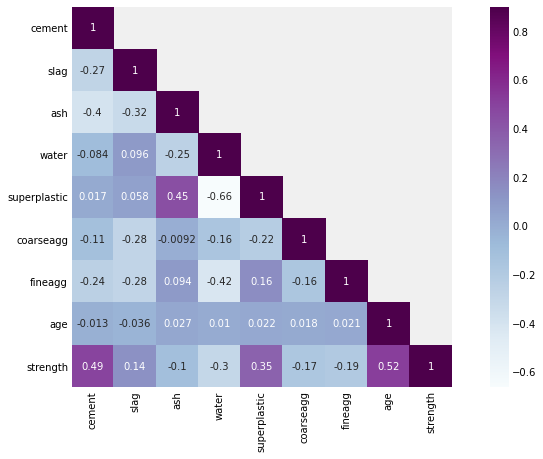

In [30]:
corr = concrete1.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(12,7)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="BuPu")

In [31]:
# Absolute correlation of independent variables with the target variable
absCorrwithDep = []
allVars = concrete1.drop('strength', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(concrete1['strength'].corr(concrete1[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

Variable Correlation
7           age        0.52
0        cement        0.49
4  superplastic        0.35
3         water        0.30
6       fineagg        0.19
5     coarseagg        0.17
1          slag        0.14
2           ash        0.10

#### Observation 5 - Correlation Matrix
None of the columns have a correlation above a threshold and thus none to be dropped.
<br>age, cement and superplastic are some of the columns that have strong influence over target variable.

## Feature Engineering
Performing feature engineering on the cement dataset. Objective here would be:

Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength
<br>Identify opportunities (if any) to create a composite feature, drop a feature
<br>Decide on complexity of the model

Feature Engineering Guassians Ref: https://www.kaggle.com/kenmatsu4/feature-engineering-with-gaussian-process

In [32]:
### Feature Engineering
concrete1.reset_index(inplace = True, drop = True)

X = concrete1.drop('strength', axis = 1)
y = concrete1['strength']
labels = KMeans(2, random_state = 0).fit_predict(X)

In [33]:
# KMeans Plots
def kplots(df, ocol):
  columns = list(set(list(df.columns))-set([ocol]))
  f, ax = plt.subplots(4, 2, figsize = (15, 17))
  ax[0][0].scatter(X[ocol], X[columns[0]], c = labels, s = 20, cmap = 'viridis');   ax[0][0].set_xlabel(ocol); ax[0][0].set_ylabel(columns[0])
  ax[0][1].scatter(X[ocol], X[columns[1]], c = labels, s = 20, cmap = 'viridis');   ax[0][1].set_xlabel(ocol); ax[0][1].set_ylabel(columns[1])
  ax[1][0].scatter(X[ocol], X[columns[2]], c = labels, s = 10, cmap = 'viridis');   ax[1][0].set_xlabel(ocol); ax[1][0].set_ylabel(columns[2])
  ax[1][1].scatter(X[ocol], X[columns[3]], c = labels, s = 10, cmap = 'viridis');   ax[1][1].set_xlabel(ocol); ax[1][1].set_ylabel(columns[3])
  ax[2][0].scatter(X[ocol], X[columns[4]], c = labels, s = 10, cmap = 'viridis');   ax[2][0].set_xlabel(ocol); ax[2][0].set_ylabel(columns[4])
  ax[2][1].scatter(X[ocol], X[columns[5]], c = labels, s = 10, cmap = 'viridis');   ax[2][1].set_xlabel(ocol); ax[2][1].set_ylabel(columns[5])
  ax[3][0].scatter(X[ocol], X[columns[6]], c = labels, s = 10, cmap = 'viridis');   ax[3][0].set_xlabel(ocol); ax[3][0].set_ylabel(columns[6])
   


cement vs Other Columns Clusters
************************************************************************************************************************


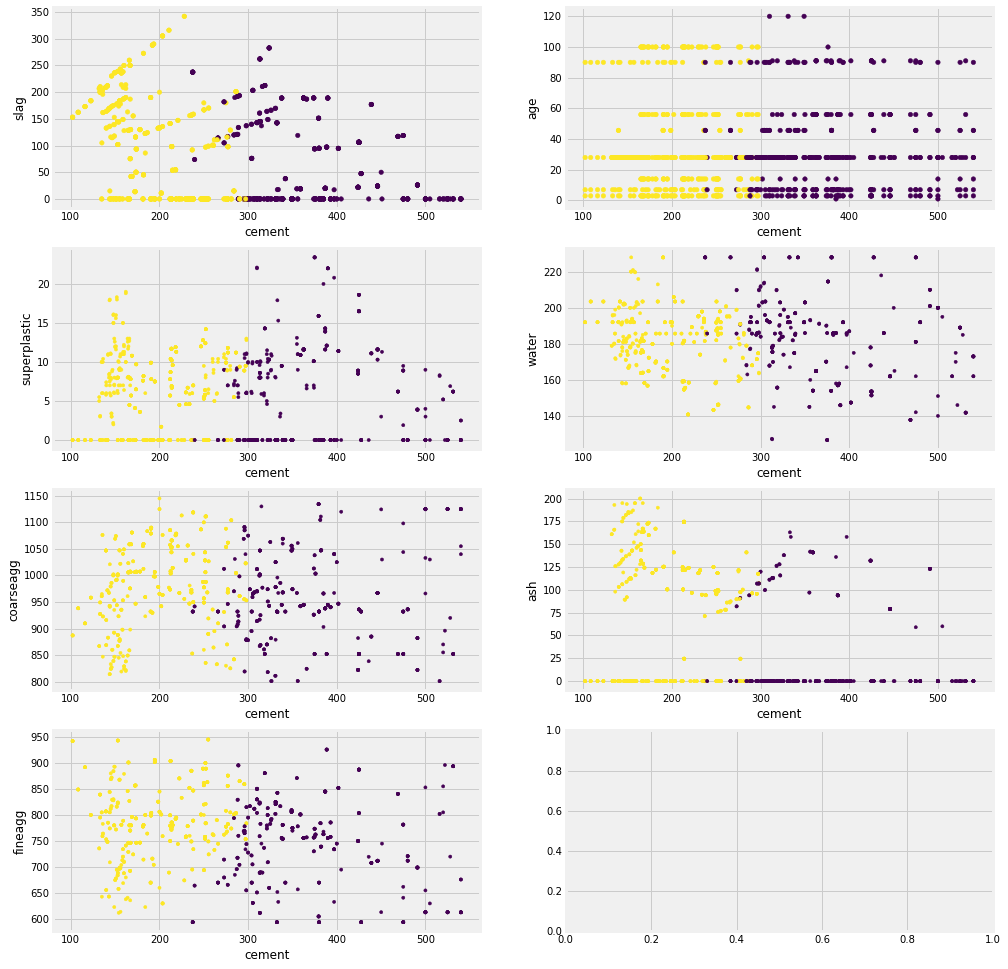


slag vs Other Columns Clusters
************************************************************************************************************************


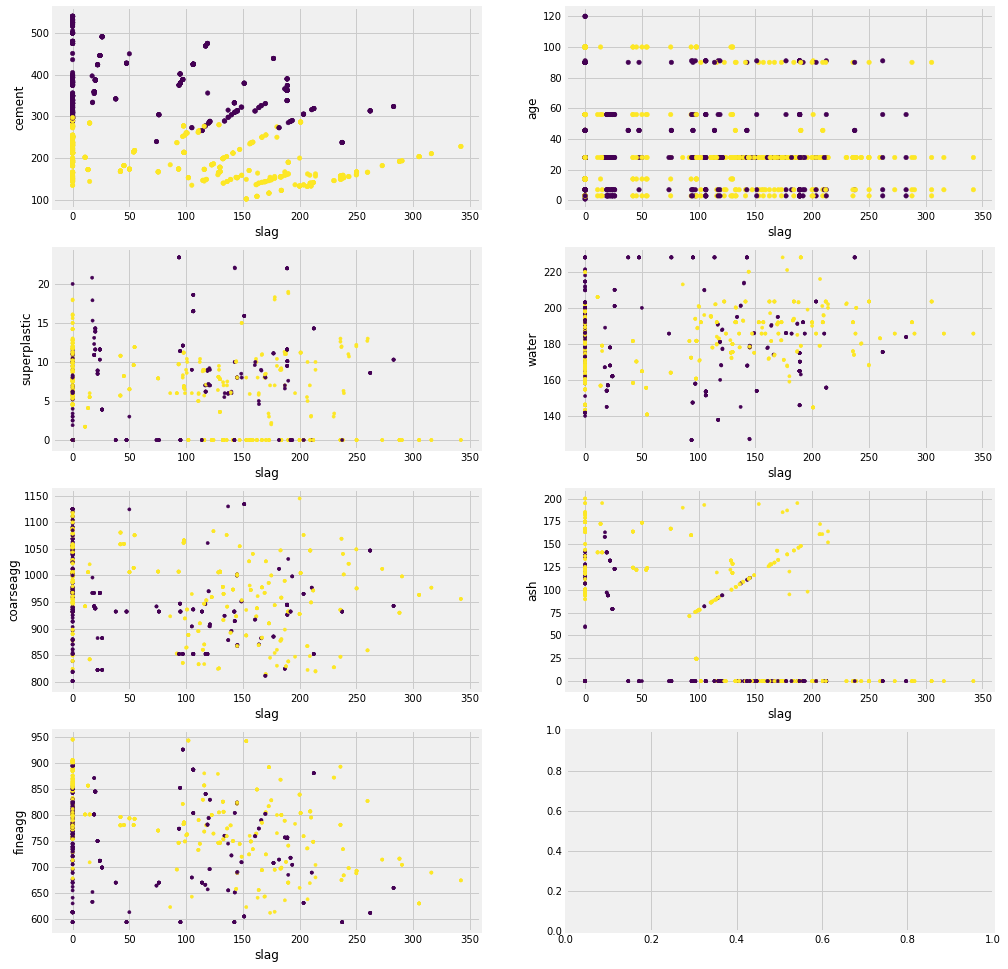


ash vs Other Columns Clusters
************************************************************************************************************************


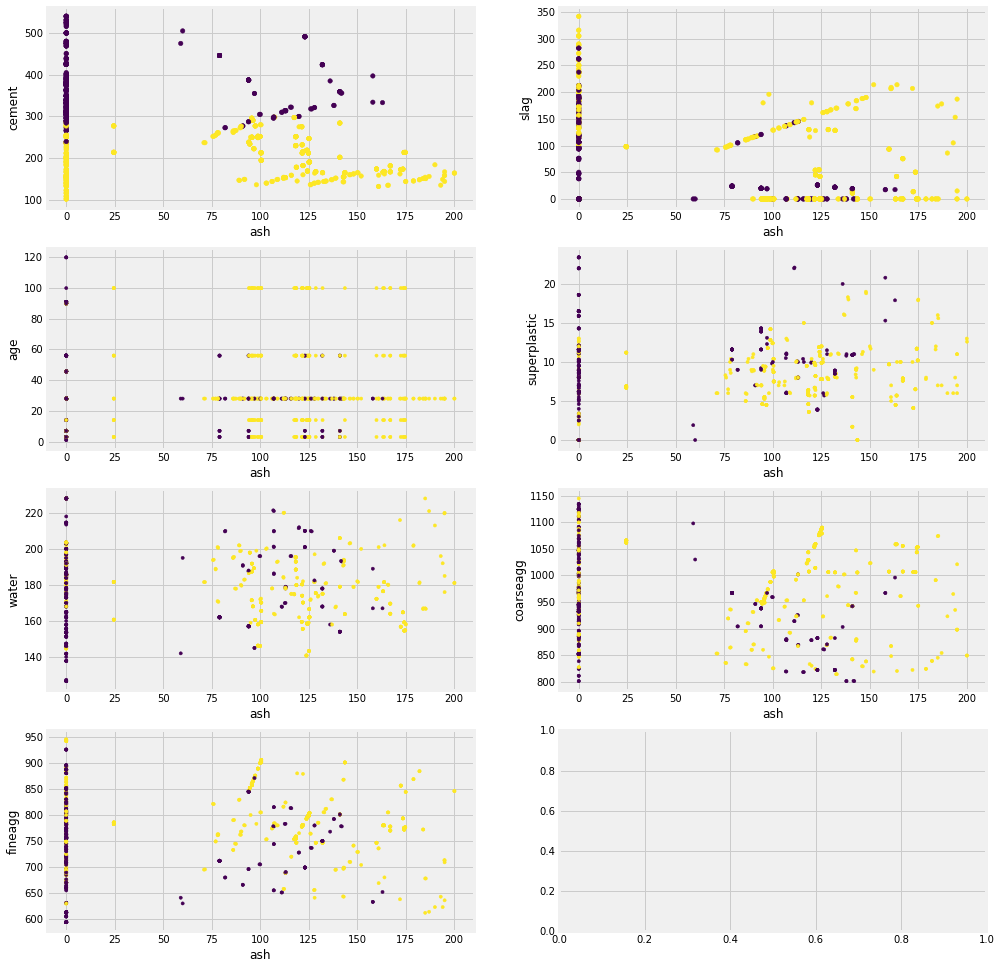


water vs Other Columns Clusters
************************************************************************************************************************


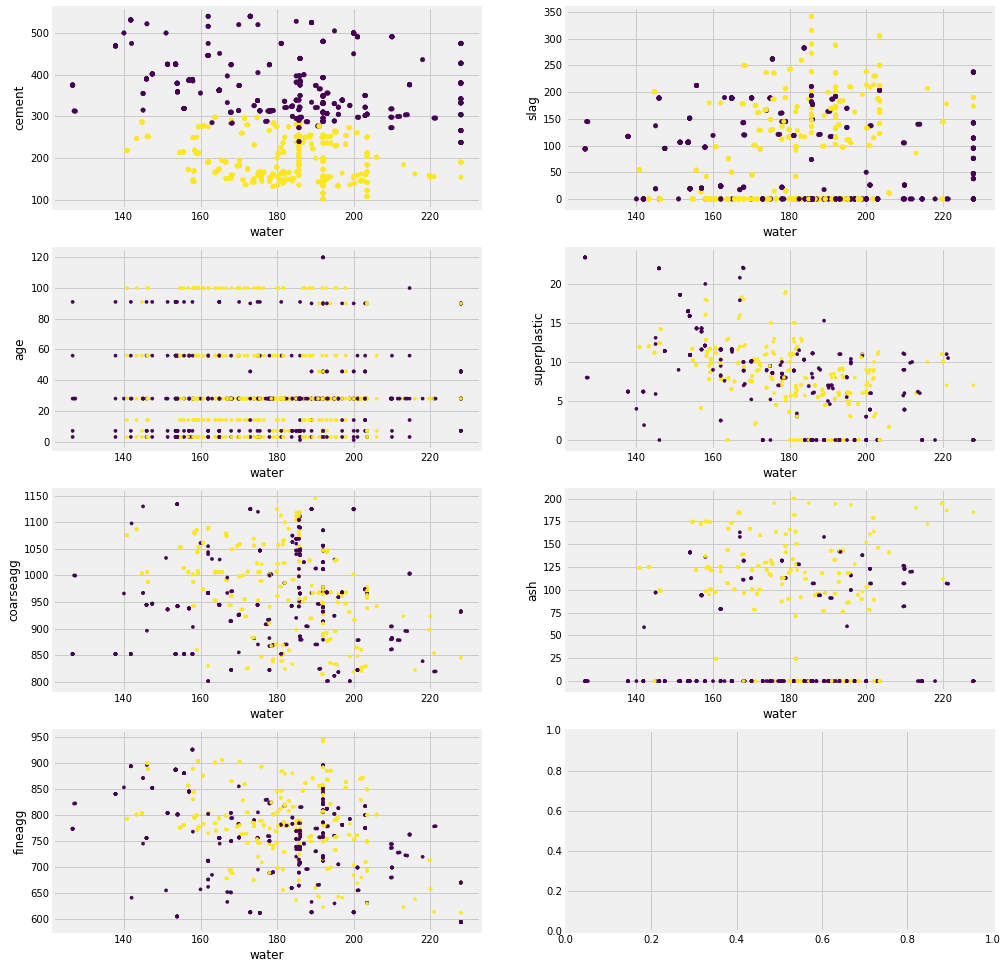


superplastic vs Other Columns Clusters
************************************************************************************************************************


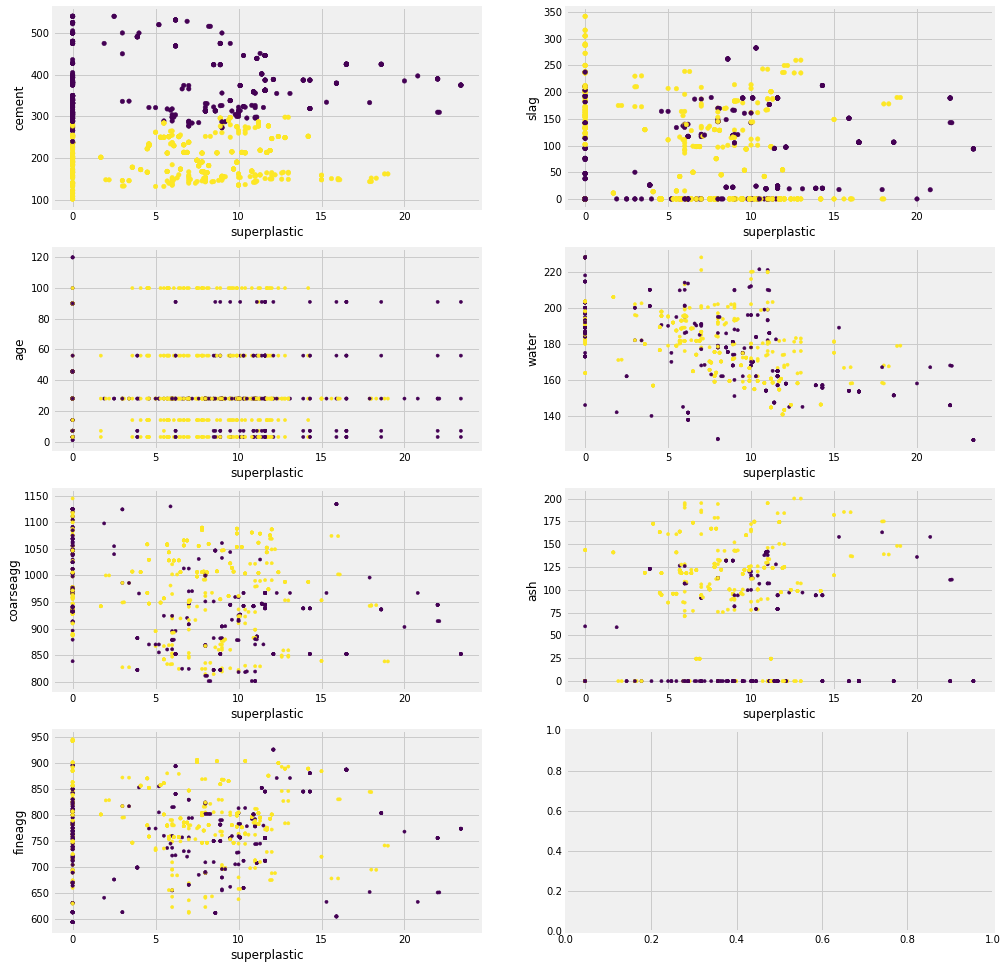


coarseagg vs Other Columns Clusters
************************************************************************************************************************


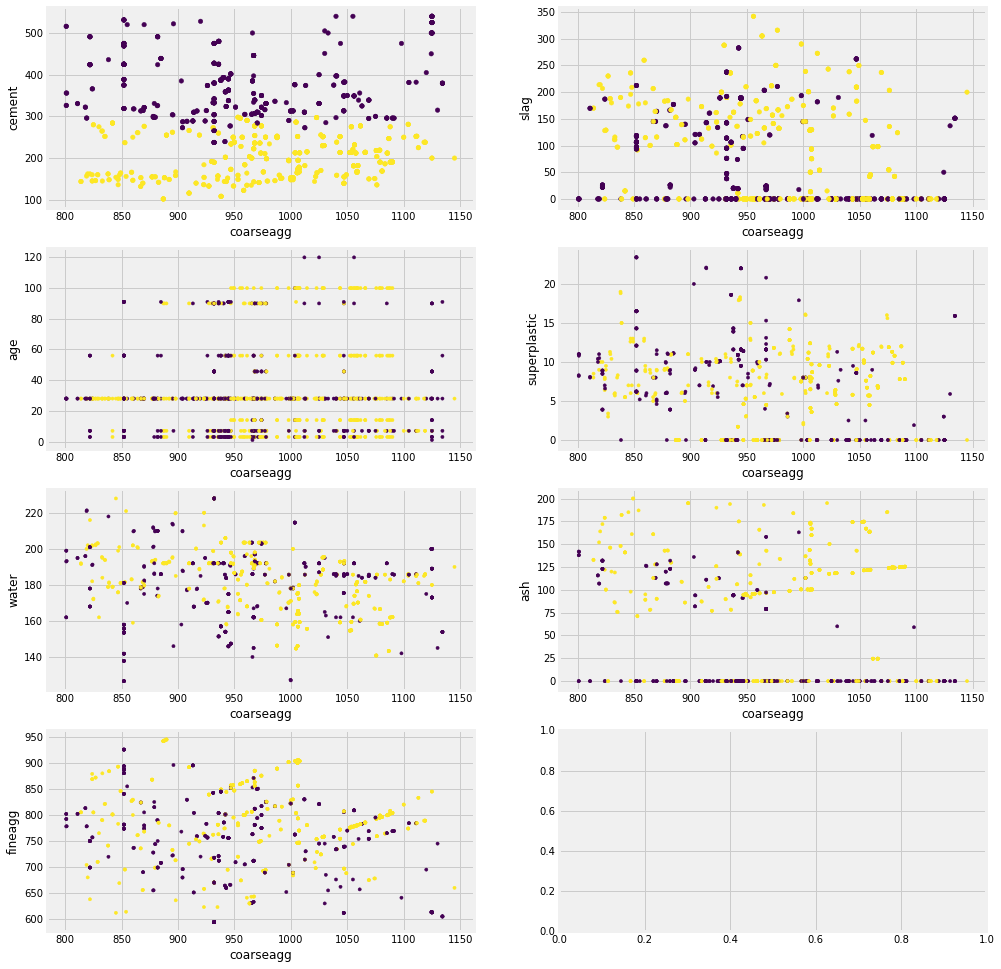


fineagg vs Other Columns Clusters
************************************************************************************************************************


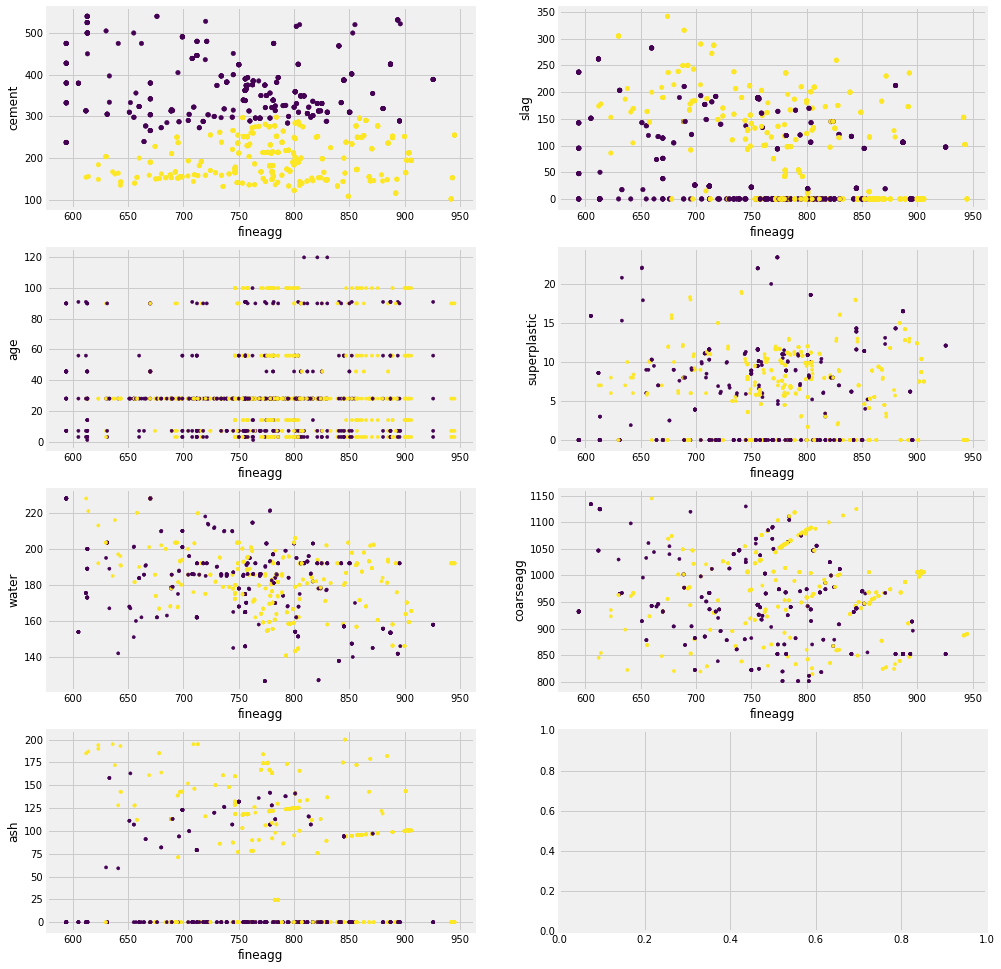


age vs Other Columns Clusters
************************************************************************************************************************


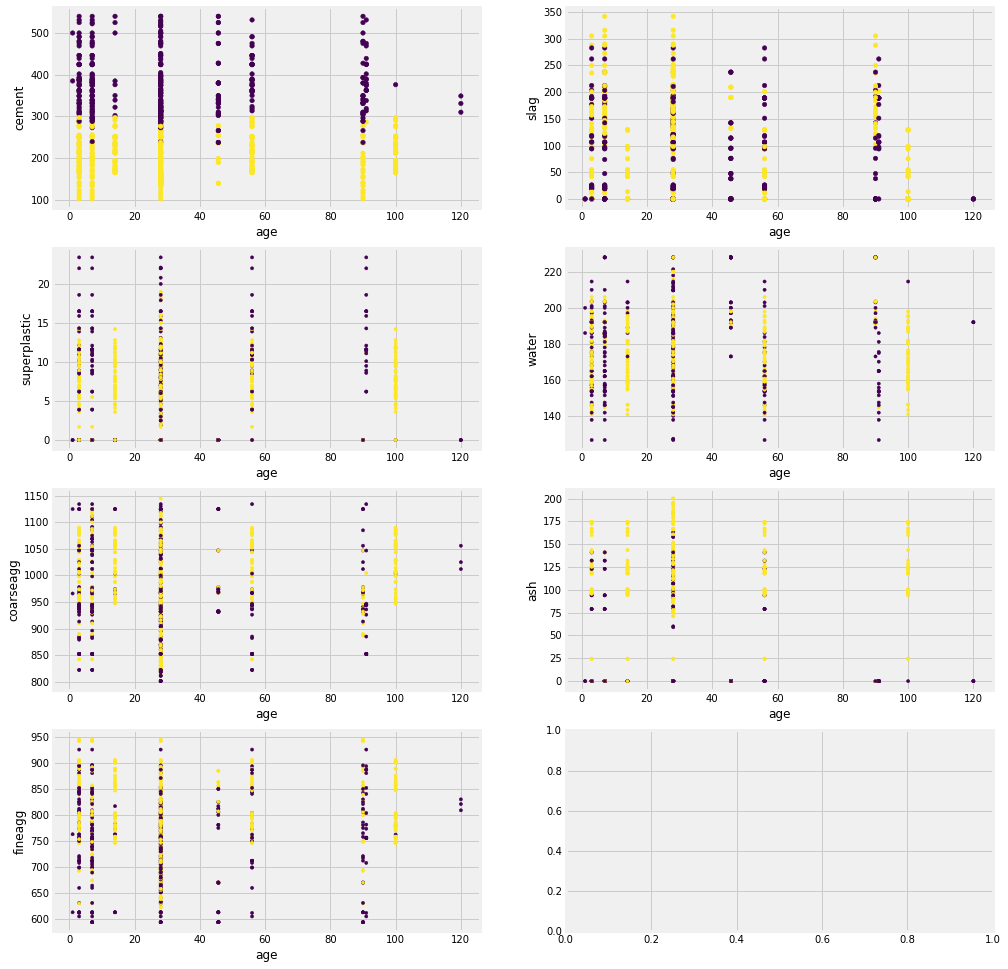

In [34]:
col_list = list(concrete1.drop('strength',axis=1).columns)
for i in col_list:
    print(f'\n{i} vs Other Columns Clusters'); print('**'*60)
    kplots(X, i)
    plt.show()
    

#### Observation 6 - Exploring clusters
Clusters can be observed with between cement and rest of the independent variables.
<br>Cluster at age 100 can be seen.


#### Adding features based on cluster analysis
Let's add features based on cluster analysis we found for cement and other columns.

In [35]:
# Adding features based on cement clusters
print('Let\'s add features based on cluster analysis we found for cement and other columns'); print('--'*60)

concrete1 = concrete1.join(pd.DataFrame(labels, columns = ['labels']), how = 'left')
cement_features = concrete1.groupby('labels', as_index = False)['cement'].agg(['mean', 'median'])
concrete1 = concrete1.merge(cement_features, on = 'labels', how = 'left')
concrete1.rename(columns = {'mean': 'cement_labels_mean', 'median': 'cement_labels_median'}, inplace = True)
concrete1.drop('labels', axis = 1, inplace = True)
display(cdescribe(concrete1))

Let's add features based on cluster analysis we found for cement and other columns
------------------------------------------------------------------------------------------------------------------------

cement - Data ranges between 102.0 to 540.0, while 25th and 75th percentile is spread between 192.0 to 350.0. Median 272.8 is less than than Mean 280.74 which means cement is Moderately Skewed (Right). Column has NoOutliers.

slag - Data ranges between 0.0 to 342.1, while 25th and 75th percentile is spread between 0.0 to 142.8. Median 22.0 is less than than Mean 73.48 which means cement is Moderately Skewed (Right). Column has NoOutliers.

ash - Data ranges between 0.0 to 200.1, while 25th and 75th percentile is spread between 0.0 to 118.3. Median 0.0 is less than than Mean 54.29 which means cement is Moderately Skewed (Right). Column has NoOutliers.

water - Data ranges between 126.6 to 228.0, while 25th and 75th percentile is spread between 164.9 to 192.0. Median 185.0 is more than 

cement                       slag  \
Count                                 1028                       1028   
Type                               float64                    float64   
Mean                                280.74                      73.48   
StdDev                              104.14                      85.38   
Variance                          10845.73                    7289.08   
Minimum                             102.00                       0.00   
Q1                                  192.00                       0.00   
Median                              272.80                      22.00   
Q3                                  350.00                     142.80   
Maximum                             540.00                     342.10   
Range                               438.00                     342.10   
IQR                                 158.00                     142.80   
Kurtosis                             -0.51                      -0.63   
Skewness                              0.51                       0.77   
MeanAbsDev                           86.49                      76.32   
SkewnessComment  Moderately Skewed (Right)  Moderately Skewed (Right)   
OutliersComment                 NoOutliers                 NoOutliers   

                                       ash                      water  \
Count                                 1028                       1028   
Type                               float64                    float64   
Mean                                 54.29                     181.69   
StdDev                               64.01                      20.56   
Variance                           4097.86                     422.74   
Minimum                               0.00                     126.60   
Q1                                    0.00                     164.90   
Median                                0.00                     185.00   
Q3                                  118.30                     192.00   
Maximum                             200.10                     228.00   
Range                               200.10                     101.40   
IQR                                 118.30                      27.10   
Kurtosis                             -1.33                      -0.03   
Skewness                              0.53                       0.09   
MeanAbsDev                           60.44                      16.35   
SkewnessComment  Moderately Skewed (Right)  Fairly Symmetrical (Left)   
OutliersComment                 NoOutliers                 NoOutliers   

                              superplastic                   coarseagg  \
Count                                 1028                        1028   
Type                               float64                     float64   
Mean                                  5.98                      972.85   
StdDev                                5.48                       77.66   
Variance                             29.99                     6030.62   
Minimum                               0.00                      801.00   
Q1                                    0.00                      932.00   
Median                                6.20                      968.00   
Q3                                   10.10                     1029.40   
Maximum                              23.40                     1145.00   
Range                                23.40                      344.00   
IQR                                  10.10                       97.40   
Kurtosis                             -0.44                       -0.60   
Skewness                              0.47                       -0.04   
MeanAbsDev                            4.69                       62.70   
SkewnessComment  Fairly Symmetrical (Left)  Fairly Symmetrical (Right)   
OutliersComment                 NoOutliers                  NoOutliers   

                                   fineagg                    age  \
Coun

None

### Identifying important feature interaction
Check whether there exist any important feature interaction which we can make use of to create new features.

In [36]:
# Splitting the dataset into train and test set for checking feature interaction
print('Checking if there exist any important feature interaction and make use of that to create features')
print('Make use catboostregressor\'s feature interaction'); print('--'*60)

X = concrete1.drop('strength', axis = 1)
y = concrete1['strength']
features_list = list(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)

# Initialize CatBoostRegressor
reg = CatBoostRegressor(iterations = None, random_state = random_state, od_type = 'Iter', od_wait = 5)

reg.fit(X_train, y_train, early_stopping_rounds = 5, verbose = False, eval_set = [(X_test, y_test)], use_best_model = True)

Checking if there exist any important feature interaction and make use of that to create features
Make use catboostregressor's feature interaction
------------------------------------------------------------------------------------------------------------------------


Feature Importance plot for catboostregressor using type = Interaction
Adding features based on cement and age; water and age can be useful
------------------------------------------------------------------------------------------------------------------------


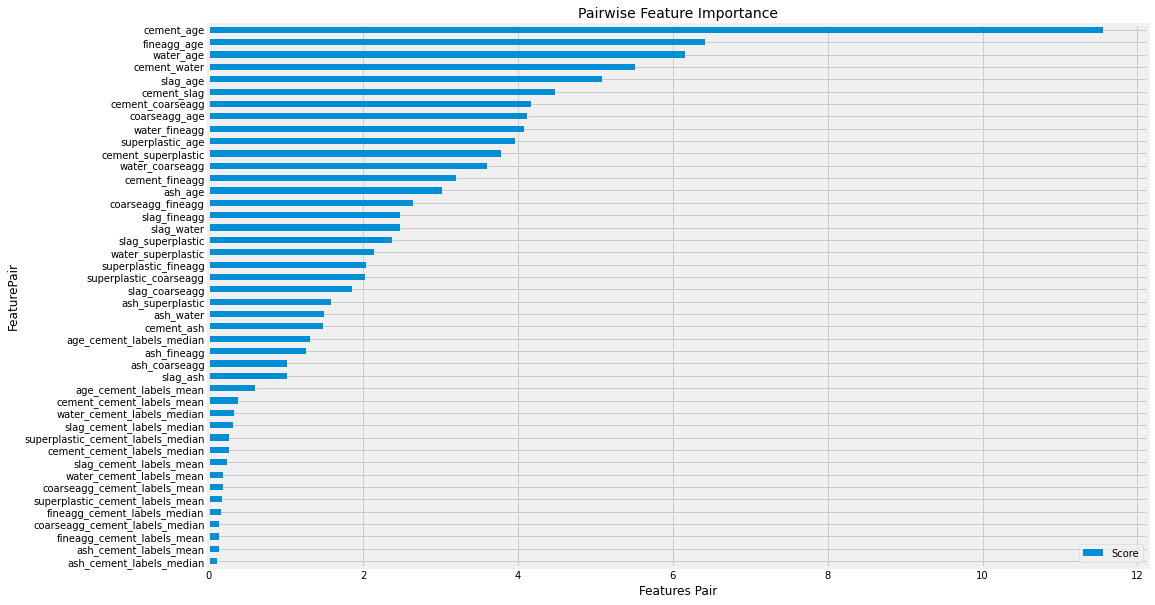

In [37]:
# Get feature importance -- Type = Interaction
print('Feature Importance plot for catboostregressor using type = Interaction'); 
print('Adding features based on cement and age; water and age can be useful'); print('--'*60)
FI = reg.get_feature_importance(Pool(X_test, label = y_test), type = 'Interaction')
FI_new = []
for k, item in enumerate(FI):  
    first = X_test.dtypes.index[FI[k][0]]
    second = X_test.dtypes.index[FI[k][1]]
    if first != second:
        FI_new.append([first + "_" + second, FI[k][2]])
feature_score = pd.DataFrame(FI_new, columns = ['FeaturePair', 'Score'])
feature_score = feature_score.sort_values(by = 'Score', ascending = True)
ax = feature_score.plot('FeaturePair', 'Score', kind = 'barh', figsize = (15, 10))
ax.set_title('Pairwise Feature Importance', fontsize = 14)
ax.set_xlabel('Features Pair')
plt.show()

### Adding Features based on feature Interaction

In [38]:
# Adding features 
cement_age = concrete1.groupby('age', as_index = False)['cement'].agg(['mean', 'median'])
concrete1 = concrete1.merge(cement_age, on = 'age', how = 'left')
concrete1.rename(columns = {'mean': 'cement_age_mean', 'median': 'cement_age_median'}, inplace = True)
water_age = concrete1.groupby('age')['water'].agg(['mean', 'median']); concrete1 = concrete1.merge(water_age, on = 'age', how = 'left')
concrete1.rename(columns = {'mean': 'water_age_mean', 'median': 'water_age_median'}, inplace = True)
concrete1.describe()

cement    slag     ash   water  superplastic  coarseagg  fineagg  \
count 1028.00 1028.00 1028.00 1028.00       1028.00    1028.00  1028.00   
mean   280.74   73.48   54.29  181.69          5.98     972.85   772.37   
std    104.14   85.38   64.01   20.56          5.48      77.66    78.68   
min    102.00    0.00    0.00  126.60          0.00     801.00   594.00   
25%    192.00    0.00    0.00  164.90          0.00     932.00   730.30   
50%    272.80   22.00    0.00  185.00          6.20     968.00   778.50   
75%    350.00  142.80  118.30  192.00         10.10    1029.40   822.20   
max    540.00  342.10  200.10  228.00         23.40    1145.00   945.00   

          age  strength  cement_labels_mean  cement_labels_median  \
count 1028.00   1028.00             1028.00               1028.00   
mean    33.28     35.74              280.74                274.50   
std     27.98     16.64               85.39                 81.05   
min      1.00      2.33              202.25                200.00   
25%      7.00     23.70              202.25                200.00   
50%     28.00     34.34              202.25                200.00   
75%     45.66     45.91              373.55                362.60   
max    120.00     82.60              373.55                362.60   

       cement_age_mean  cement_age_median  water_age_mean  water_age_median  
count          1028.00            1028.00         1028.00           1028.00  
mean            280.74             270.42          181.69            183.12  
std              31.43              35.00           10.52             13.74  
min             220.91             213.75          157.76            154.80  
25%             264.32             254.50          176.63            178.50  
50%             264.32             260.90          182.81            185.00  
75%             294.17             288.50          182.81            185.00  
max             442.50             442.50          210.80            228.00

### Feature Importance

In [39]:
X = concrete1.drop('strength', axis = 1)
y = concrete1['strength']
features_list = list(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)
reg = CatBoostRegressor(iterations = None, random_state = random_state, od_type = 'Iter', od_wait = 5)
reg.fit(X_train, y_train, early_stopping_rounds = 5, verbose = False, eval_set = [(X_test, y_test)], use_best_model = True)

In [40]:
# Get feature importance -- eli5
perm = PermutationImportance(reg, random_state = random_state).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Feature Importance plot for catboostregressor using type = PredictionValuesChange
Age, cement and water are top 3 importance features
------------------------------------------------------------------------------------------------------------------------


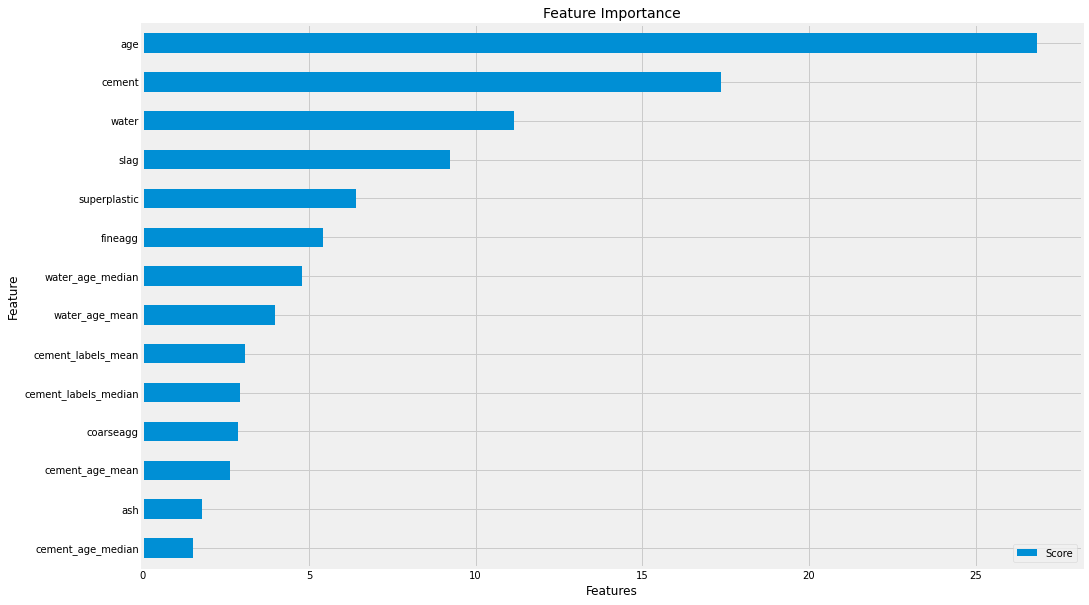

In [41]:
# Get feature importance -- model based
print('Feature Importance plot for catboostregressor using type = PredictionValuesChange'); 
print('Age, cement and water are top 3 importance features'); print('--'*60)
FI = reg.get_feature_importance(Pool(X_test, label = y_test), type = 'PredictionValuesChange')
feature_score = pd.DataFrame(list(zip(X_test.dtypes.index, FI)), columns = ['Feature', 'Score'])
feature_score = feature_score.sort_values(by = 'Score', ascending = True)
ax = feature_score.plot('Feature', 'Score', kind = 'barh', figsize = (15, 10))
ax.set_title('Feature Importance', fontsize = 14)
ax.set_xlabel('Features')
plt.show()

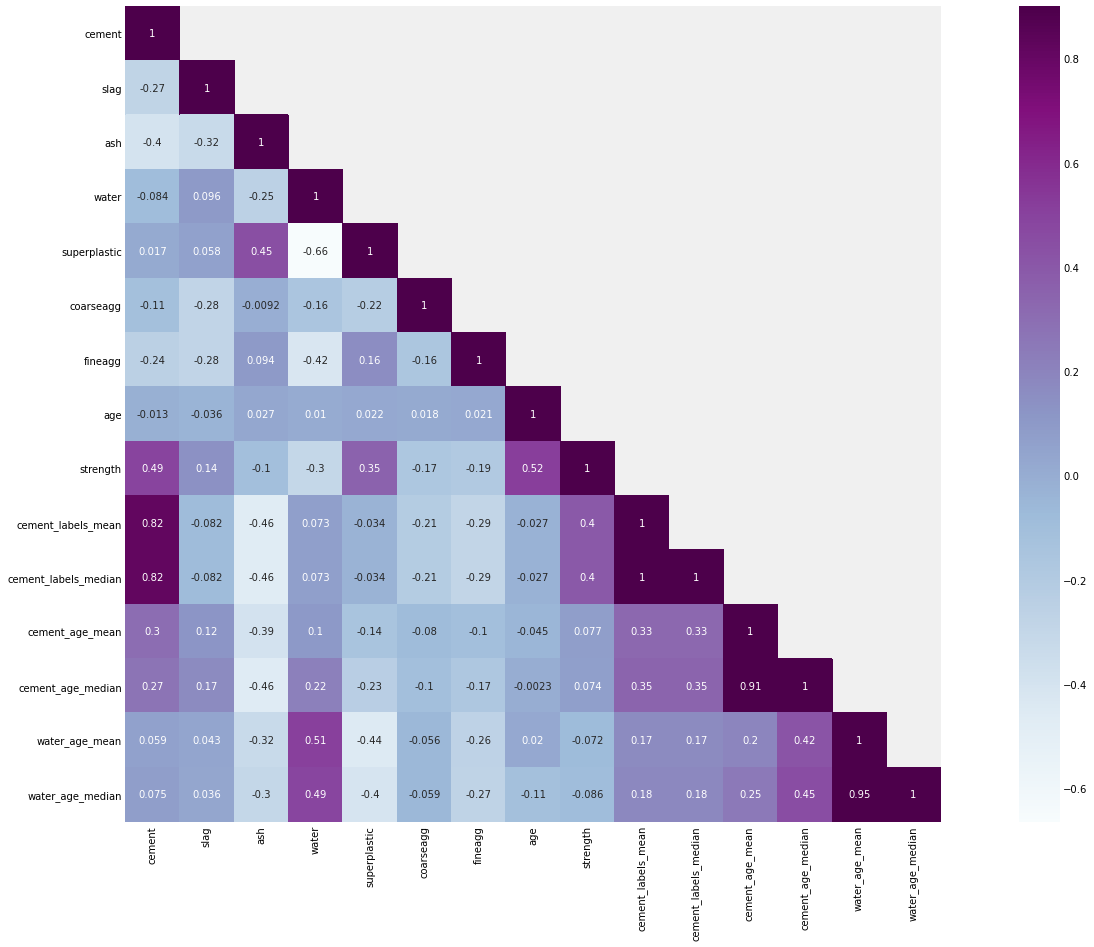

In [42]:
# Correlation matrix
corr = concrete1.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(25,15)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="BuPu")

In [43]:
# Absolute correlation of independent variables with the target variable
absCorrwithDep = []
allVars = concrete1.drop('strength', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(concrete1['strength'].corr(concrete1[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

Variable Correlation
7                    age        0.52
0                 cement        0.49
9   cement_labels_median        0.40
8     cement_labels_mean        0.40
4           superplastic        0.35
3                  water        0.30
6                fineagg        0.19
5              coarseagg        0.17
1                   slag        0.14
2                    ash        0.10
13      water_age_median        0.09
10       cement_age_mean        0.08
11     cement_age_median        0.07
12        water_age_mean        0.07

In [44]:
print('Checking if multicollinearity exists')
print('A Variable Influence Factor between 5 and 10 indicates high correlation that may be problematic. \
And if the Variable Influence Factor goes above 10, you can assume that the regression coefficients are poorly estimated \
due to multicollinearity.')
print('--'*60)

y, X = dmatrices('strength ~ cement + slag + ash + water + superplastic + coarseagg + fineagg + age + cement_labels_mean + cement_labels_median + cement_age_mean + cement_age_median + water_age_mean + water_age_median', 
                 concrete1, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VI Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
display(vif.round(1).sort_values(by = 'VI Factor', ascending = False))

Checking if multicollinearity exists
A Variable Influence Factor between 5 and 10 indicates high correlation that may be problematic. And if the Variable Influence Factor goes above 10, you can assume that the regression coefficients are poorly estimated due to multicollinearity.
------------------------------------------------------------------------------------------------------------------------


VI Factor              Features
9         inf    cement_labels_mean
10        inf  cement_labels_median
13      15.90        water_age_mean
14      15.00      water_age_median
12       9.10     cement_age_median
1        7.80                cement
11       7.80       cement_age_mean
2        5.90                  slag
7        5.60               fineagg
3        5.50                   ash
4        5.50                 water
6        4.00             coarseagg
5        3.20          superplastic
8        1.30                   age
0        0.00             Intercept

#### Observation 7 - Feature Engineering
age, cement, water, slag are some of the importance features based on eli5 and model based feature importance. Dropping all newly added features since they resulted in multicollinearity.

In [45]:
concrete1.drop(['water_age_mean', 'water_age_median', 'cement_age_mean', 'cement_labels_mean', 'cement_labels_median', 'cement_age_mean'], axis = 1, inplace = True)
concrete1.shape, concrete1.columns

((1028, 10),
 Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
        'fineagg', 'age', 'strength', 'cement_age_median'],
       dtype='object'))

## Model Complexity

In [46]:
print('Split into training (70%), validation(10%) and test(20%) sets for both with EDA and FE & without EDA and FE.')
print('--'*60)

# Training, validation and test sets with outliers
X = concrete.drop('strength', axis = 1); y = concrete['strength']; features_list = list(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.12, random_state = random_state)
print(f'Shape of train, valid and test datasets without EDA, FE: {(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)}')
print(f'Proportion in the splits for train, valid, test datasets without EDA, FE: {round(len(X_train)/len(X), 2), round(len(X_val)/len(X), 2), round(len(X_test)/len(X), 2)}')

# Training, validation and test sets without outliers
X = concrete1.drop('strength', axis = 1); y = concrete1['strength']; features_list = list(X.columns)
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X, y, test_size = 0.2, random_state = random_state)
X_train_fe, X_val_fe, y_train_fe, y_val_fe = train_test_split(X_train_fe, y_train_fe, test_size = 0.12, random_state = random_state)
print(f'\nShape of train, valid and test datasets with EDA, FE: {(X_train_fe.shape, y_train_fe.shape, X_val_fe.shape, y_val_fe.shape, X_test_fe.shape, y_test_fe.shape)}')
print(f'Proportion in the splits for train, valid, test datasets with EDA, FE: {round(len(X_train_fe)/len(X), 2), round(len(X_val_fe)/len(X), 2), round(len(X_test_fe)/len(X), 2)}')

training_test_sets = {'withoutedafe': (X_train, y_train, X_val, y_val), 'withedafe': (X_train_fe, y_train_fe, X_val_fe, y_val_fe)}

Split into training (70%), validation(10%) and test(20%) sets for both with EDA and FE & without EDA and FE.
------------------------------------------------------------------------------------------------------------------------
Shape of train, valid and test datasets without EDA, FE: ((725, 8), (725,), (99, 8), (99,), (206, 8), (206,))
Proportion in the splits for train, valid, test datasets without EDA, FE: (0.7, 0.1, 0.2)

Shape of train, valid and test datasets with EDA, FE: ((723, 9), (723,), (99, 9), (99,), (206, 9), (206,))
Proportion in the splits for train, valid, test datasets with EDA, FE: (0.7, 0.1, 0.2)


### Check the improvement from dataset we had, also decide on complexity

In [47]:
print('Let\'s check cross validated scores on linear models and tree-based models on training and validation sets with and without EDA & FE')
print('--'*60)
models = []
models.append(('Linear', LinearRegression()))
models.append(('Lasso', Lasso(random_state = random_state)))
models.append(('Ridge', Ridge(random_state = random_state)))
models.append(('SVR', SVR()))
models.append(('DecisionTree', DecisionTreeRegressor(random_state = random_state)))
models.append(('GradientBoost', GradientBoostingRegressor(random_state = random_state)))
models.append(('AdaBoost', AdaBoostRegressor(random_state = random_state)))
models.append(('ExtraTrees', ExtraTreesRegressor(random_state = random_state)))
models.append(('RandomForest', RandomForestRegressor(random_state = random_state)))
models.append(('Bagging', BaggingRegressor(DecisionTreeRegressor(random_state = random_state), random_state = random_state)))
models.append(('CatBoost', CatBoostRegressor(random_state = random_state, silent = True)))

scoring = 'r2'; results = {}; score = {}

for encoding_label, (_X_train, _y_train, _X_val, _y_val) in training_test_sets.items():
  scores = []; result_cv = []; names = []
  for name, model in models:
    kf = KFold(n_splits = 10, random_state = random_state)
    cv_results = cross_val_score(model, _X_train, _y_train, cv = kf, scoring = scoring)
    result_cv.append(cv_results); names.append(name)
    scores.append([name, cv_results.mean().round(4), cv_results.std().round(4)])
  score[encoding_label] = scores
  results[encoding_label] = [names, result_cv]

print('Let\'s check the cv scores (r2) for sets without EDA and FE')
display(score['withoutedafe'])

print('\nLet\'s check the cv scores (r2) for sets with EDA and FE')
display(score['withedafe'])

Let's check cross validated scores on linear models and tree-based models on training and validation sets with and without EDA & FE
------------------------------------------------------------------------------------------------------------------------
Let's check the cv scores (r2) for sets without EDA and FE


[['Linear', 0.6129, 0.0333],
 ['Lasso', 0.6126, 0.0328],
 ['Ridge', 0.6129, 0.0333],
 ['SVR', 0.013, 0.0113],
 ['DecisionTree', 0.8108, 0.0657],
 ['GradientBoost', 0.8871, 0.0234],
 ['AdaBoost', 0.7819, 0.0254],
 ['ExtraTrees', 0.8924, 0.0284],
 ['RandomForest', 0.8792, 0.0284],
 ['Bagging', 0.8822, 0.0284],
 ['CatBoost', 0.9244, 0.0226]]


Let's check the cv scores (r2) for sets with EDA and FE


[['Linear', 0.721, 0.0405],
 ['Lasso', 0.721, 0.0396],
 ['Ridge', 0.721, 0.0405],
 ['SVR', 0.0065, 0.0185],
 ['DecisionTree', 0.7949, 0.0555],
 ['GradientBoost', 0.8866, 0.0237],
 ['AdaBoost', 0.7567, 0.0346],
 ['ExtraTrees', 0.8811, 0.0283],
 ['RandomForest', 0.8671, 0.0313],
 ['Bagging', 0.867, 0.0352],
 ['CatBoost', 0.9217, 0.0207]]

In [48]:
pd.options.display.float_format = "{:.4f}".format

scores_df = pd.concat([pd.DataFrame(score['withoutedafe'], columns = ['Model', 'R2 (Mean) Without', 'R2 (Std) Without']).set_index('Model'), 
           pd.DataFrame(score['withedafe'], columns = ['Model', 'R2 (Mean) With', 'R2 (Std) With']).set_index('Model')], axis = 1)
scores_df['Improvement?'] = scores_df['R2 (Mean) With'] - scores_df['R2 (Mean) Without']
display(scores_df)

R2 (Mean) Without  R2 (Std) Without  R2 (Mean) With  \
Model                                                                
Linear                    0.6129            0.0333          0.7210   
Lasso                     0.6126            0.0328          0.7210   
Ridge                     0.6129            0.0333          0.7210   
SVR                       0.0130            0.0113          0.0065   
DecisionTree              0.8108            0.0657          0.7949   
GradientBoost             0.8871            0.0234          0.8866   
AdaBoost                  0.7819            0.0254          0.7567   
ExtraTrees                0.8924            0.0284          0.8811   
RandomForest              0.8792            0.0284          0.8671   
Bagging                   0.8822            0.0284          0.8670   
CatBoost                  0.9244            0.0226          0.9217   

               R2 (Std) With  Improvement?  
Model                                       
Linear                0.0405        0.1081  
Lasso                 0.0396        0.1084  
Ridge                 0.0405        0.1081  
SVR                   0.0185       -0.0065  
DecisionTree          0.0555       -0.0159  
GradientBoost         0.0237       -0.0005  
AdaBoost              0.0346       -0.0252  
ExtraTrees            0.0283       -0.0113  
RandomForest          0.0313       -0.0121  
Bagging               0.0352       -0.0152  
CatBoost              0.0207       -0.0027

A significant improvement in r2 scores after EDA & FE for linear algorithms whereas remains almost same for tree-based algorithms.
------------------------------------------------------------------------------------------------------------------------


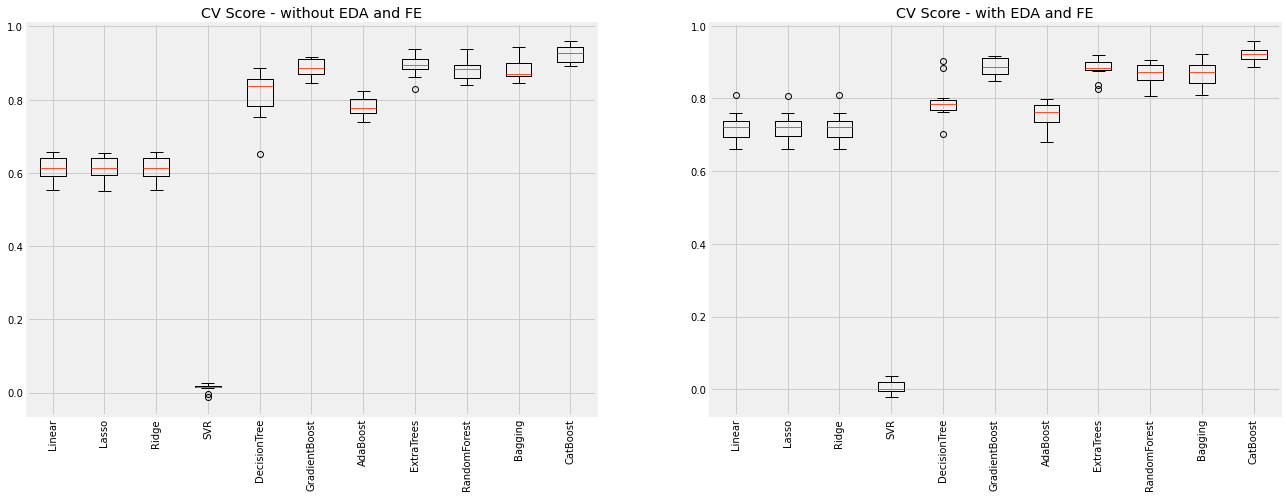

In [49]:
print('A significant improvement in r2 scores after EDA & FE for linear algorithms whereas remains almost same for tree-based algorithms.'); print('--'*60)

fig,(ax1, ax2) = plt.subplots(1, 2, figsize = (20, 7.2))
ax1.boxplot(results['withoutedafe'][1]); ax1.set_xticklabels(results['withoutedafe'][0], rotation = 90); ax1.set_title('CV Score - without EDA and FE')
ax2.boxplot(results['withedafe'][1]); ax2.set_xticklabels(results['withedafe'][0], rotation = 90); ax2.set_title('CV Score - with EDA and FE')
plt.show()

#### Observation 8 - Model Complexity
We see an improvement in the scores against the uncleaned data we had. Improvements are clearly seen for linear algos whereas for tree-based it either marginally increases/decreases.
Tree-based algorithms are a clear choice when it comes to linear vs tree-based comparison.

## Scale or not scale?

In [50]:
# For rmse scoring
def rmse_score(y, y_pred):
    return np.sqrt(np.mean((y_pred - y)**2))

In [51]:
scalers = {'notscaled': None, 'standardscaling': StandardScaler(), 'robustscaling': RobustScaler()}

training_test_sets = {'validation_sets': (X_train_fe, y_train_fe, X_val_fe, y_val_fe),
                      'test_sets': (X_train_fe, y_train_fe, X_test_fe, y_test_fe)}

# initialize model
cat_reg = CatBoostRegressor(iterations = None, eval_metric = 'RMSE', random_state = random_state, od_type = 'Iter', od_wait = 5)

# iterate over all possible combinations and get the errors
errors = {}
for encoding_label, (_X_train, _y_train, _X_val, _y_val) in training_test_sets.items():
    for scaler_label, scaler in scalers.items():
        scores = []
        if scaler == None:
          trainingset = _X_train.copy()
          testset = _X_val.copy()
          cat_reg.fit(trainingset, _y_train, early_stopping_rounds = 5, verbose = False, plot = False,
                      eval_set = [(testset, _y_val)], use_best_model = True)
          pred = cat_reg.predict(testset)
          rmse = rmse_score(_y_val, pred)
          r2 = r2_score(_y_val, pred)
          scores.append([rmse, r2])
          key = encoding_label + ' - ' + scaler_label
          errors[key] = scores[0]
        else:
          trainingset = _X_train.copy()
          testset = _X_val.copy()
          trainingset = scaler.fit_transform(trainingset)
          testset = scaler.transform(testset)
          cat_reg.fit(trainingset, _y_train, early_stopping_rounds = 5, verbose = False, plot = False,
                      eval_set = [(testset, _y_val)], use_best_model = True)
          pred = cat_reg.predict(testset)
          rmse = rmse_score(_y_val, pred)
          r2 = r2_score(_y_val, pred)
          scores.append([rmse, r2])
          key = encoding_label + ' - ' + scaler_label
          errors[key] = scores[0]

In [52]:
# Function to get top results from grid search and randomized search
def search_report(results):
    df = pd.concat([pd.DataFrame(results.cv_results_['params']), pd.DataFrame(results.cv_results_['mean_test_score'], columns = ['r2'])], axis = 1)
    return df

In [53]:
print('It can be seen that RMSE is lowest when robust scaling is used whereas R2 almost remains same as un-scaled data.'); 
print('Scaling would help to effectively use the training and validation sets across algorithms.');print('--'*60)

display(errors)

It can be seen that RMSE is lowest when robust scaling is used whereas R2 almost remains same as un-scaled data.
Scaling would help to effectively use the training and validation sets across algorithms.
------------------------------------------------------------------------------------------------------------------------


{'validation_sets - notscaled': [4.4528588099977595, 0.9392593219040716],
 'validation_sets - standardscaling': [4.4528588099977595, 0.9392593219040716],
 'validation_sets - robustscaling': [4.4528588099977595, 0.9392593219040716],
 'test_sets - notscaled': [4.151286169294852, 0.9350995429054046],
 'test_sets - standardscaling': [4.150874220070032, 0.9351124229456398],
 'test_sets - robustscaling': [4.149223824988122, 0.9351640115232525]}

#### Observation 9
It can be seen that RMSE and R2 score is almost same for notscled or standardscaling or robustscaling, 

## Modelling

In [54]:
## Helper function to train, validate and predict
def train_val_predict(basemodel, train_X, train_y, test_X, test_y, name, model):

  folds = list(KFold(n_splits = 5, random_state = random_state, shuffle = True).split(train_X, train_y))
  
  r2_scores_train = []; r2_scores_val = []; r2_scores_test = []

  for j, (train_index, val_index) in enumerate(folds):
    X_train = train_X.iloc[train_index]
    y_train = train_y.iloc[train_index]
    X_val = train_X.iloc[val_index]
    y_val = train_y.iloc[val_index]

    if model == 'CatBoost':
      basemodel.fit(X_train, y_train, early_stopping_rounds = 5, verbose = 300, eval_set = [(X_val, y_val)], use_best_model = True)
    else:
      basemodel.fit(X_train, y_train)

    pred = basemodel.predict(X_train)
    r2 = r2_score(y_train, pred); r2_scores_train.append(r2)
    
    pred = basemodel.predict(X_val)
    r2 = r2_score(y_val, pred); r2_scores_val.append(r2)

    pred = basemodel.predict(X_test_fe)
    r2 = r2_score(y_test_fe, pred); r2_scores_test.append(r2)

  df = pd.DataFrame([np.mean(r2_scores_train), np.mean(r2_scores_val), np.mean(r2_scores_test)],
                    index = ['r2 Scores Train', 'r2 Scores Val', 'r2 Scores Test'], 
                    columns = [name]).T
  return df

In [55]:
print('Separating the dependents and independents + Scaling the data'); print('--'*60)
features_list = list(concrete1.columns)
concrete1 = concrete1.apply(zscore); concrete1 = pd.DataFrame(concrete1 , columns = features_list)
display(concrete1.describe())

X = concrete1.drop('strength', axis = 1); y = concrete1['strength']; 
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X, y, test_size = 0.2, random_state = random_state)

X_train_fe.shape, X_test_fe.shape, y_train_fe.shape, y_test_fe.shape

Separating the dependents and independents + Scaling the data
------------------------------------------------------------------------------------------------------------------------


cement      slag       ash     water  superplastic  coarseagg  \
count 1028.0000 1028.0000 1028.0000 1028.0000     1028.0000  1028.0000   
mean    -0.0000    0.0000    0.0000   -0.0000        0.0000     0.0000   
std      1.0005    1.0005    1.0005    1.0005        1.0005     1.0005   
min     -1.7171   -0.8611   -0.8486   -2.6808       -1.0932    -2.2140   
25%     -0.8525   -0.8611   -0.8486   -0.8171       -1.0932    -0.5263   
50%     -0.0762   -0.6033   -0.8486    0.1609        0.0404    -0.0625   
75%      0.6654    0.8123    1.0004    0.5016        0.7521     0.7285   
max      2.4907    3.1478    2.2788    2.2533        3.1821     2.2179   

        fineagg       age  strength  cement_age_median  
count 1028.0000 1028.0000 1028.0000          1028.0000  
mean    -0.0000    0.0000    0.0000            -0.0000  
std      1.0005    1.0005    1.0005             1.0005  
min     -2.2682   -1.1543   -2.0092            -1.6196  
25%     -0.5350   -0.9397   -0.7244            -0.4549  
50%      0.0779   -0.1888   -0.0842            -0.2720  
75%      0.6336    0.4428    0.6112             0.5169  
max      2.1952    3.1012    2.8174             4.9185

((822, 9), (206, 9), (822,), (206,))

### Linear Regression

In [56]:
print('Using the 5-Fold Linear Regression to train, validate and predict'); print('--'*60)
lr_reg = LinearRegression()
df_lr = train_val_predict(lr_reg, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold LinearRegression', model = 'LR')

Using the 5-Fold Linear Regression to train, validate and predict
------------------------------------------------------------------------------------------------------------------------


### Lasso Regression

In [57]:
%%time
print('Using the 5-Fold Lasso Regression to train, validate and predict'); print('--'*60)
lasso_reg = Lasso(alpha = 0.01)
df_lasso = train_val_predict(lasso_reg, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold LassoRegression', model = 'Lasso')
df = df_lr.append(df_lasso)

Using the 5-Fold Lasso Regression to train, validate and predict
------------------------------------------------------------------------------------------------------------------------
Wall time: 79.8 ms


### Ridge Regression

In [58]:
%%time
print('Using the 5-Fold Ridge Regression to train, validate and predict'); print('--'*60)
ridge_reg = Ridge(alpha = 0.01)
df_ridge = train_val_predict(ridge_reg, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold RidgeRegression', model = 'Ridge')
df = df.append(df_ridge)

Using the 5-Fold Ridge Regression to train, validate and predict
------------------------------------------------------------------------------------------------------------------------
Wall time: 73.8 ms


In [59]:
display(df)

r2 Scores Train  r2 Scores Val  r2 Scores Test
5-Fold LinearRegression           0.7473         0.7355          0.7170
5-Fold LassoRegression            0.7461         0.7351          0.7154
5-Fold RidgeRegression            0.7473         0.7355          0.7170

### Decision Tree and Random Forest

In [60]:
%%time
print('Finding out the hyperparameters for Decision Tree and Random Forest with GridSearchCV'); print('--'*60)
best_params_grid = {}

# Decision Tree and Random Forest Regressor Hyperparameters Grid
param_grid = {'DecisionTree': {'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None]},
              'RandomForest': {'bootstrap': [True, False], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                                'max_features': ['auto', 'sqrt'], 'n_estimators': [200, 400, 600, 800]}}

# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state = random_state)
dt_reg_grid = GridSearchCV(dt_reg, param_grid['DecisionTree'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
dt_reg_grid.fit(X_train_fe, y_train_fe)
best_params_grid['DecisionTree'] = dt_reg_grid.best_params_

# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state = random_state)
rf_reg_grid = GridSearchCV(rf_reg, param_grid['RandomForest'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
rf_reg_grid.fit(X_train_fe, y_train_fe)
best_params_grid['RandomForest'] = rf_reg_grid.best_params_

print(f'Best parameters for Decision Tree and Random Forest using GridSearchCV: {best_params_grid}')

Finding out the hyperparameters for Decision Tree and Random Forest with GridSearchCV
------------------------------------------------------------------------------------------------------------------------
Best parameters for Decision Tree and Random Forest using GridSearchCV: {'DecisionTree': {'criterion': 'mae', 'max_depth': 9}, 'RandomForest': {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}}
Wall time: 10min 1s


In [61]:
%%time
print('Finding out the hyperparameters for Decision Tree and Random Forest with RandomizedSearchCV'); print('--'*60)
best_params_random = {}

# Decision Tree and Random Forest Regressor Hyperparameters Grid
param_grid = {'DecisionTree': {'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None]},
              'RandomForest': {'bootstrap': [True, False], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                                'max_features': ['auto', 'sqrt'], 'n_estimators': [200, 400, 600, 800]}}

# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state = random_state)
dt_reg_grid = RandomizedSearchCV(dt_reg, param_grid['DecisionTree'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
dt_reg_grid.fit(X_train_fe, y_train_fe)
best_params_random['DecisionTree'] = dt_reg_grid.best_params_

# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state = random_state)
rf_reg_grid = RandomizedSearchCV(rf_reg, param_grid['RandomForest'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
rf_reg_grid.fit(X_train_fe, y_train_fe)
best_params_random['RandomForest'] = rf_reg_grid.best_params_

print(f'Best parameters for Decision Tree and Random Forest using RandomizedSearchCV: {best_params_random}')

Finding out the hyperparameters for Decision Tree and Random Forest with RandomizedSearchCV
------------------------------------------------------------------------------------------------------------------------
Best parameters for Decision Tree and Random Forest using RandomizedSearchCV: {'DecisionTree': {'max_depth': None, 'criterion': 'mae'}, 'RandomForest': {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 8, 'bootstrap': False}}
Wall time: 39.2 s


In [62]:
%%time
print('Using the 5-Fold Decision Tree Regressor to train, validate and predict'); print('--'*60)
dt_reg = DecisionTreeRegressor(random_state = random_state)
df_reg = train_val_predict(dt_reg, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold DecisionTree', model = 'DT')
df = df.append(df_reg)

Using the 5-Fold Decision Tree Regressor to train, validate and predict
------------------------------------------------------------------------------------------------------------------------
Wall time: 102 ms


In [63]:
%%time
print('Using the 5-Fold Decision Tree Regressor to train, validate and predict using GridSearchCV'); print('--'*60)
dt_reg_grid = DecisionTreeRegressor(random_state = random_state, **best_params_grid['DecisionTree'])
df_reg_grid = train_val_predict(dt_reg_grid, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold DecisionTree GridSearchCV', model = 'DT')
df = df.append(df_reg_grid)

Using the 5-Fold Decision Tree Regressor to train, validate and predict using GridSearchCV
------------------------------------------------------------------------------------------------------------------------
Wall time: 357 ms


In [64]:
%%time
print('Using the 5-Fold Decision Tree Regressor to train, validate and predict using RandomizedSearchCV'); print('--'*60)
dt_reg_rand = DecisionTreeRegressor(random_state = random_state, **best_params_random['DecisionTree'])
df_reg_rand = train_val_predict(dt_reg_rand, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold DecisionTree RandomizedSearchCV', model = 'DT')
df = df.append(df_reg_rand)

Using the 5-Fold Decision Tree Regressor to train, validate and predict using RandomizedSearchCV
------------------------------------------------------------------------------------------------------------------------
Wall time: 407 ms


In [65]:
display(df)

r2 Scores Train  r2 Scores Val  \
5-Fold LinearRegression                          0.7473         0.7355   
5-Fold LassoRegression                           0.7461         0.7351   
5-Fold RidgeRegression                           0.7473         0.7355   
5-Fold DecisionTree                              0.9962         0.7994   
5-Fold DecisionTree GridSearchCV                 0.9562         0.7877   
5-Fold DecisionTree RandomizedSearchCV           0.9953         0.7915   

                                        r2 Scores Test  
5-Fold LinearRegression                         0.7170  
5-Fold LassoRegression                          0.7154  
5-Fold RidgeRegression                          0.7170  
5-Fold DecisionTree                             0.8331  
5-Fold DecisionTree GridSearchCV                0.7950  
5-Fold DecisionTree RandomizedSearchCV          0.8103

## Random Forest

In [66]:
%%time
print('Using the 5-Fold Random Forest Regressor to train, validate and predict'); print('--'*60)
rf_reg = RandomForestRegressor(random_state = random_state)
df_reg = train_val_predict(rf_reg, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold RandomForest', model = 'RF')
df = df.append(df_reg)

Using the 5-Fold Random Forest Regressor to train, validate and predict
------------------------------------------------------------------------------------------------------------------------
Wall time: 465 ms


In [67]:
%%time
print('Using the 5-Fold Random Forest Regressor to train, validate and predict using GridSearchCV'); print('--'*60)
rf_reg_grid = RandomForestRegressor(random_state = random_state, **best_params_grid['RandomForest'])
df_reg_grid = train_val_predict(rf_reg_grid, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold RandomForest GridSearchCV', model = 'RF')
df = df.append(df_reg_grid)

Using the 5-Fold Random Forest Regressor to train, validate and predict using GridSearchCV
------------------------------------------------------------------------------------------------------------------------
Wall time: 4.8 s


In [68]:
%%time
print('Using the 5-Fold Random Forest Regressor to train, validate and predict using RandomizedSearchCV'); print('--'*60)
rf_reg_rand = RandomForestRegressor(random_state = random_state, **best_params_random['RandomForest'])
df_reg_rand = train_val_predict(rf_reg_rand, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold RandomForest RandomizedSearchCV', model = 'RF')
df = df.append(df_reg_rand)

Using the 5-Fold Random Forest Regressor to train, validate and predict using RandomizedSearchCV
------------------------------------------------------------------------------------------------------------------------
Wall time: 3.58 s


In [69]:
display(df)

r2 Scores Train  r2 Scores Val  \
5-Fold LinearRegression                          0.7473         0.7355   
5-Fold LassoRegression                           0.7461         0.7351   
5-Fold RidgeRegression                           0.7473         0.7355   
5-Fold DecisionTree                              0.9962         0.7994   
5-Fold DecisionTree GridSearchCV                 0.9562         0.7877   
5-Fold DecisionTree RandomizedSearchCV           0.9953         0.7915   
5-Fold RandomForest                              0.9766         0.8815   
5-Fold RandomForest GridSearchCV                 0.9962         0.9029   
5-Fold RandomForest RandomizedSearchCV           0.9653         0.8771   

                                        r2 Scores Test  
5-Fold LinearRegression                         0.7170  
5-Fold LassoRegression                          0.7154  
5-Fold RidgeRegression                          0.7170  
5-Fold DecisionTree                             0.8331  
5-Fold DecisionTree GridSearchCV                0.7950  
5-Fold DecisionTree RandomizedSearchCV          0.8103  
5-Fold RandomForest                             0.8997  
5-Fold RandomForest GridSearchCV                0.9124  
5-Fold RandomForest RandomizedSearchCV          0.8906

## Bagging Regressor

In [70]:
%%time
print('Using the 5-Fold Bagging Regressor to train, validate and predict'); print('--'*60)
bag_reg = BaggingRegressor(random_state = random_state)
bag_reg = train_val_predict(bag_reg, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold Bagging', model = 'Bag')
df = df.append(bag_reg)

Using the 5-Fold Bagging Regressor to train, validate and predict
------------------------------------------------------------------------------------------------------------------------
Wall time: 493 ms


In [71]:
%%time
# Bagging Regressor Hyperparameters Grid
print('Finding out the hyperparameters for Bagging Regressor with GridSearchCV'); print('--'*60)

param_grid = {'Bagging': {'base_estimator': [DecisionTreeRegressor(random_state = random_state, **best_params_grid['DecisionTree']), None],
                           'n_estimators': [100, 150, 200]}}
# Bagging Regressor
bag_reg = BaggingRegressor(random_state = random_state)
bag_reg_grid = GridSearchCV(bag_reg, param_grid['Bagging'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
bag_reg_grid.fit(X_train_fe, y_train_fe)
best_params_grid['Bagging'] = bag_reg_grid.best_params_

print('Best parameters for Bagging Regressor using GridSearchCV: {}'.format(best_params_grid['Bagging']))


Finding out the hyperparameters for Bagging Regressor with GridSearchCV
------------------------------------------------------------------------------------------------------------------------
Best parameters for Bagging Regressor using GridSearchCV: {'base_estimator': None, 'n_estimators': 200}
Wall time: 32.7 s


In [72]:
%%time
# Bagging Regressor Hyperparameters Grid with RandomizedSearchCV
print('Finding out the hyperparameters for Bagging with RandomizedSearchCV'); print('--'*60)

param_grid = {'Bagging': {'base_estimator': [DecisionTreeRegressor(random_state = random_state, **best_params_grid['DecisionTree']), None],
                           'n_estimators': [100, 150, 200]}}

# Bagging Regressor
bag_reg = BaggingRegressor(random_state = random_state)
bag_reg_rand = RandomizedSearchCV(bag_reg, param_grid['Bagging'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
bag_reg_rand.fit(X_train_fe, y_train_fe)
best_params_random['Bagging'] = bag_reg_rand.best_params_

print('Best parameters for Bagging Regressor using RandomizedSearchCV: {}'.format(best_params_random['Bagging']))

Finding out the hyperparameters for Bagging with RandomizedSearchCV
------------------------------------------------------------------------------------------------------------------------
Best parameters for Bagging Regressor using RandomizedSearchCV: {'n_estimators': 200, 'base_estimator': None}
Wall time: 32.6 s


In [73]:
%%time
print('Using the 5-Fold Bagging Regressor to train, validate and predict using GridSearchCV'); print('--'*60)
bag_reg_grid = BaggingRegressor(random_state = random_state, **best_params_grid['Bagging'])
df_reg_grid = train_val_predict(bag_reg_grid, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold Bagging using GridSearchCV', model = 'Bag')
df = df.append(df_reg_grid)

Using the 5-Fold Bagging Regressor to train, validate and predict using GridSearchCV
------------------------------------------------------------------------------------------------------------------------
Wall time: 6.83 s


In [74]:
%%time
print('Using the 5-Fold Bagging Regressor to train, validate and predict using RandomizedSearchCV'); print('--'*60)
bag_reg_rand = BaggingRegressor(random_state = random_state, **best_params_random['Bagging'])
df_reg_rand = train_val_predict(bag_reg_rand, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold Bagging using RandomizedSearchCV', model = 'Bag')
df = df.append(df_reg_rand)

Using the 5-Fold Bagging Regressor to train, validate and predict using RandomizedSearchCV
------------------------------------------------------------------------------------------------------------------------
Wall time: 6.56 s


In [75]:
display(df)

r2 Scores Train  r2 Scores Val  \
5-Fold LinearRegression                           0.7473         0.7355   
5-Fold LassoRegression                            0.7461         0.7351   
5-Fold RidgeRegression                            0.7473         0.7355   
5-Fold DecisionTree                               0.9962         0.7994   
5-Fold DecisionTree GridSearchCV                  0.9562         0.7877   
5-Fold DecisionTree RandomizedSearchCV            0.9953         0.7915   
5-Fold RandomForest                               0.9766         0.8815   
5-Fold RandomForest GridSearchCV                  0.9962         0.9029   
5-Fold RandomForest RandomizedSearchCV            0.9653         0.8771   
5-Fold Bagging                                    0.9766         0.8858   
5-Fold Bagging using GridSearchCV                 0.9832         0.8968   
5-Fold Bagging using RandomizedSearchCV           0.9832         0.8968   

                                         r2 Scores Test  
5-Fold LinearRegression                          0.7170  
5-Fold LassoRegression                           0.7154  
5-Fold RidgeRegression                           0.7170  
5-Fold DecisionTree                              0.8331  
5-Fold DecisionTree GridSearchCV                 0.7950  
5-Fold DecisionTree RandomizedSearchCV           0.8103  
5-Fold RandomForest                              0.8997  
5-Fold RandomForest GridSearchCV                 0.9124  
5-Fold RandomForest RandomizedSearchCV           0.8906  
5-Fold Bagging                                   0.8999  
5-Fold Bagging using GridSearchCV                0.9125  
5-Fold Bagging using RandomizedSearchCV          0.9125

## AdaBoost Regressor

In [76]:
%%time
# AdaBoost Regressor Hyperparameters with GridSearchCV
print('Finding out the hyperparameters for AdaBoostRegressor with GridSearchCV'); print('--'*60)

param_grid = {'AdaBoost': {'base_estimator': [DecisionTreeRegressor(random_state = random_state, **best_params_grid['DecisionTree']), None],
                           'n_estimators': [100, 150, 200], 'learning_rate': [0.01, 0.1, 1.0]}}

# AdaBoost Regressor
ada_reg = AdaBoostRegressor(random_state = random_state)
ada_reg_grid = GridSearchCV(ada_reg, param_grid['AdaBoost'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
ada_reg_grid.fit(X_train_fe, y_train_fe)
best_params_grid['AdaBoost'] = ada_reg_grid.best_params_

print('Best parameters for AdaBoost Regressor using GridSearchCV: {}'.format(best_params_grid['AdaBoost']))

Finding out the hyperparameters for AdaBoostRegressor with GridSearchCV
------------------------------------------------------------------------------------------------------------------------
Best parameters for AdaBoost Regressor using GridSearchCV: {'base_estimator': DecisionTreeRegressor(criterion='mae', max_depth=9, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=2020, splitter='best'), 'learning_rate': 0.1, 'n_estimators': 100}
Wall time: 2min 3s


In [77]:
%%time
# AdaBoost Regressor Hyperparameters Grid with RandomizedSearchCV
print('Finding out the hyperparameters for AdaBoostRegressor with RandomizedSearchCV'); print('--'*60)

param_grid = {'AdaBoost': {'base_estimator': [DecisionTreeRegressor(random_state = random_state, **best_params_grid['DecisionTree']), None],
                           'n_estimators': [100, 150, 200], 'learning_rate': [0.01, 0.1, 1.0]}}

# AdaBoost Regressor
ada_reg = AdaBoostRegressor(random_state = random_state)
ada_reg_rand = RandomizedSearchCV(ada_reg, param_grid['AdaBoost'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
ada_reg_rand.fit(X_train_fe, y_train_fe)
best_params_random['AdaBoost'] = ada_reg_rand.best_params_

print('Best parameters for AdaBoost Regressor using RandomizedSearchCV: {}'.format(best_params_random['AdaBoost']))

Finding out the hyperparameters for AdaBoostRegressor with RandomizedSearchCV
------------------------------------------------------------------------------------------------------------------------
Best parameters for AdaBoost Regressor using RandomizedSearchCV: {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeRegressor(criterion='mae', max_depth=9, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=2020, splitter='best')}
Wall time: 1min 20s


In [78]:
%%time
print('Using the 5-Fold Ada Boost Regressor to train, validate and predict'); print('--'*60)
ada_reg = AdaBoostRegressor(random_state = random_state)
df_reg = train_val_predict(ada_reg, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold AdaBoost', model = 'Ada')
df = df.append(df_reg)

Using the 5-Fold Ada Boost Regressor to train, validate and predict
------------------------------------------------------------------------------------------------------------------------
Wall time: 960 ms


In [79]:
%%time
print('Using the 5-Fold Ada Boost Regressor to train, validate and predict using GridSearchCV'); print('--'*60)
ada_reg_grid = AdaBoostRegressor(random_state = random_state, **best_params_grid['AdaBoost'])
df_reg_grid = train_val_predict(ada_reg_grid, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold AdaBoost using GridSearchCV', model = 'Ada')
df = df.append(df_reg_grid)

Using the 5-Fold Ada Boost Regressor to train, validate and predict using GridSearchCV
------------------------------------------------------------------------------------------------------------------------
Wall time: 22.1 s


In [80]:
%%time
print('Using the 5-Fold Ada Boost Regressor to train, validate and predict using RandomizedSearchCV'); print('--'*60)
ada_reg_rand = AdaBoostRegressor(random_state = random_state, **best_params_random['AdaBoost'])
df_reg_rand = train_val_predict(ada_reg_rand, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold AdaBoost using RandomizedSearchCV', model = 'Ada')
df = df.append(df_reg_rand)

Using the 5-Fold Ada Boost Regressor to train, validate and predict using RandomizedSearchCV
------------------------------------------------------------------------------------------------------------------------
Wall time: 22.6 s


In [81]:
display(df)

r2 Scores Train  r2 Scores Val  \
5-Fold LinearRegression                            0.7473         0.7355   
5-Fold LassoRegression                             0.7461         0.7351   
5-Fold RidgeRegression                             0.7473         0.7355   
5-Fold DecisionTree                                0.9962         0.7994   
5-Fold DecisionTree GridSearchCV                   0.9562         0.7877   
5-Fold DecisionTree RandomizedSearchCV             0.9953         0.7915   
5-Fold RandomForest                                0.9766         0.8815   
5-Fold RandomForest GridSearchCV                   0.9962         0.9029   
5-Fold RandomForest RandomizedSearchCV             0.9653         0.8771   
5-Fold Bagging                                     0.9766         0.8858   
5-Fold Bagging using GridSearchCV                  0.9832         0.8968   
5-Fold Bagging using RandomizedSearchCV            0.9832         0.8968   
5-Fold AdaBoost                                    0.8195         0.7645   
5-Fold AdaBoost using GridSearchCV                 0.9893         0.8907   
5-Fold AdaBoost using RandomizedSearchCV           0.9893         0.8907   

                                          r2 Scores Test  
5-Fold LinearRegression                           0.7170  
5-Fold LassoRegression                            0.7154  
5-Fold RidgeRegression                            0.7170  
5-Fold DecisionTree                               0.8331  
5-Fold DecisionTree GridSearchCV                  0.7950  
5-Fold DecisionTree RandomizedSearchCV            0.8103  
5-Fold RandomForest                               0.8997  
5-Fold RandomForest GridSearchCV                  0.9124  
5-Fold RandomForest RandomizedSearchCV            0.8906  
5-Fold Bagging                                    0.8999  
5-Fold Bagging using GridSearchCV                 0.9125  
5-Fold Bagging using RandomizedSearchCV           0.9125  
5-Fold AdaBoost                                   0.7993  
5-Fold AdaBoost using GridSearchCV                0.8996  
5-Fold AdaBoost using RandomizedSearchCV          0.8996

## GradientBoost Regressor

In [82]:
%%time
# GradientBoostRegressor Hyperparameters Grid with GriedSearchCV
print('Finding out the hyperparameters for GradientBoostRegressor with GridSearchCV'); print('--'*60)

param_grid = {'GradientBoost': {'max_depth': [5, 6, 7, 8, 9, 10, None], 'max_features': ['auto', 'sqrt'], 
                                'n_estimators': [600, 800, 1000]}}

# GradientBoostRegressor
gb_reg = GradientBoostingRegressor(random_state = random_state)
gb_reg_grid = GridSearchCV(gb_reg, param_grid['GradientBoost'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
gb_reg_grid.fit(X_train_fe, y_train_fe)
best_params_grid['GradientBoost'] = gb_reg_grid.best_params_

print('Best parameters for Gradient Boost Regressor using GridSearchCV: {}'.format(best_params_grid['GradientBoost']))

Finding out the hyperparameters for GradientBoostRegressor with GridSearchCV
------------------------------------------------------------------------------------------------------------------------
Best parameters for Gradient Boost Regressor using GridSearchCV: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 600}
Wall time: 1min 45s


In [83]:
%%time
# GradientBoostRegressor Hyperparameters Grid with RndomizedSearchCV
print('Finding out the hyperparameters for GradientBoostRegressor with RandomizedSearchCV'); print('--'*60)

param_grid = {'GradientBoost': {'max_depth': [5, 6, 7, 8, 9, 10, None], 'max_features': ['auto', 'sqrt'], 
                                'n_estimators': [600, 800, 1000]}}

# GradientBoostRegressor
gb_reg = GradientBoostingRegressor(random_state = random_state)
gb_reg_rand = RandomizedSearchCV(gb_reg, param_grid['GradientBoost'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
gb_reg_rand.fit(X_train_fe, y_train_fe)
best_params_random['GradientBoost'] = gb_reg_rand.best_params_

print('Best parameters for Gradient Boost Regressor using RandomizedSearchCV: {}'.format(best_params_random['GradientBoost']))

Finding out the hyperparameters for GradientBoostRegressor with RandomizedSearchCV
------------------------------------------------------------------------------------------------------------------------
Best parameters for Gradient Boost Regressor using RandomizedSearchCV: {'n_estimators': 600, 'max_features': 'sqrt', 'max_depth': 5}
Wall time: 26.3 s


In [84]:
%%time
print('Using the 5-Fold Gradient Boost Regressor to train, validate and predict'); print('--'*60)
gb_reg = GradientBoostingRegressor(random_state = random_state)
df_reg = train_val_predict(gb_reg, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold GradientBoost', model = 'GB')
df = df.append(df_reg)

Using the 5-Fold Gradient Boost Regressor to train, validate and predict
------------------------------------------------------------------------------------------------------------------------
Wall time: 557 ms


In [85]:
%%time
print('Using the 5-Fold Gradient Boost Regressor to train, validate and predict using GridSearchCV'); print('--'*60)
gb_reg_grid = GradientBoostingRegressor(random_state = random_state, **best_params_grid['GradientBoost'])
df_reg_grid = train_val_predict(gb_reg_grid, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold GradientBoost using GridSearchCV', model = 'GB')
df = df.append(df_reg_grid)

Using the 5-Fold Gradient Boost Regressor to train, validate and predict using GridSearchCV
------------------------------------------------------------------------------------------------------------------------
Wall time: 2.92 s


In [86]:
%%time
print('Using the 5-Fold Gradient Boost Regressor to train, validate and predict using RandomizedSearchCV'); print('--'*60)
gb_reg_rand = GradientBoostingRegressor(random_state = random_state, **best_params_random['GradientBoost'])
df_reg_rand = train_val_predict(gb_reg_rand, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold GradientBoost using RandomizedSearchCV', model = 'GB')
df = df.append(df_reg_rand)

Using the 5-Fold Gradient Boost Regressor to train, validate and predict using RandomizedSearchCV
------------------------------------------------------------------------------------------------------------------------
Wall time: 2.9 s


In [87]:
 display(df)

r2 Scores Train  r2 Scores Val  \
5-Fold LinearRegression                                 0.7473         0.7355   
5-Fold LassoRegression                                  0.7461         0.7351   
5-Fold RidgeRegression                                  0.7473         0.7355   
5-Fold DecisionTree                                     0.9962         0.7994   
5-Fold DecisionTree GridSearchCV                        0.9562         0.7877   
5-Fold DecisionTree RandomizedSearchCV                  0.9953         0.7915   
5-Fold RandomForest                                     0.9766         0.8815   
5-Fold RandomForest GridSearchCV                        0.9962         0.9029   
5-Fold RandomForest RandomizedSearchCV                  0.9653         0.8771   
5-Fold Bagging                                          0.9766         0.8858   
5-Fold Bagging using GridSearchCV                       0.9832         0.8968   
5-Fold Bagging using RandomizedSearchCV                 0.9832         0.8968   
5-Fold AdaBoost                                         0.8195         0.7645   
5-Fold AdaBoost using GridSearchCV                      0.9893         0.8907   
5-Fold AdaBoost using RandomizedSearchCV                0.9893         0.8907   
5-Fold GradientBoost                                    0.9499         0.8979   
5-Fold GradientBoost using GridSearchCV                 0.9961         0.9269   
5-Fold GradientBoost using RandomizedSearchCV           0.9961         0.9269   

                                               r2 Scores Test  
5-Fold LinearRegression                                0.7170  
5-Fold LassoRegression                                 0.7154  
5-Fold RidgeRegression                                 0.7170  
5-Fold DecisionTree                                    0.8331  
5-Fold DecisionTree GridSearchCV                       0.7950  
5-Fold DecisionTree RandomizedSearchCV                 0.8103  
5-Fold RandomForest                                    0.8997  
5-Fold RandomForest GridSearchCV                       0.9124  
5-Fold RandomForest RandomizedSearchCV                 0.8906  
5-Fold Bagging                                         0.8999  
5-Fold Bagging using GridSearchCV                      0.9125  
5-Fold Bagging using RandomizedSearchCV                0.9125  
5-Fold AdaBoost                                        0.7993  
5-Fold AdaBoost using GridSearchCV                     0.8996  
5-Fold AdaBoost using RandomizedSearchCV               0.8996  
5-Fold GradientBoost                                   0.9102  
5-Fold GradientBoost using GridSearchCV                0.9332  
5-Fold GradientBoost using RandomizedSearchCV          0.9332

## ExtraTrees Regressor

In [88]:
%%time
# ExtraTreesRegressor Hyperparameters Grid with GridSearchCV
print('Finding out the hyperparameters for ExtraTreesRegressor with GridSearchCV'); print('--'*60)

param_grid = {'ExtraTrees': {'max_depth': [5, 6, 7, 8, 9, 10, None], 'max_features': ['auto', 'sqrt'], 
                                'n_estimators': [100, 600, 800, 1000]}}

# ExtraTreesRegressor
et_reg = ExtraTreesRegressor(random_state = random_state)
et_reg_grid = GridSearchCV(et_reg, param_grid['ExtraTrees'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
et_reg_grid.fit(X_train_fe, y_train_fe)
best_params_grid['ExtraTrees'] = et_reg_grid.best_params_

print('Best parameters for Extra Trees Regressor using GridSearchCV: {}'.format(best_params_grid['ExtraTrees']))

Finding out the hyperparameters for ExtraTreesRegressor with GridSearchCV
------------------------------------------------------------------------------------------------------------------------
Best parameters for Extra Trees Regressor using GridSearchCV: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 800}
Wall time: 3min 11s


In [89]:
%%time
# ExtraTreesRegressor Hyperparameters Grid with RandomizedSearchCV
print('Finding out the hyperparameters for ExtraTreesRegressor with RandomizedSearchCV'); print('--'*60)

param_grid = {'ExtraTrees': {'max_depth': [5, 6, 7, 8, 9, 10, None], 'max_features': ['auto', 'sqrt'], 
                                'n_estimators': [100, 600, 800, 1000]}}

# ExtraTreesRegressor
et_reg = ExtraTreesRegressor(random_state = random_state)
et_reg_rand = RandomizedSearchCV(et_reg, param_grid['ExtraTrees'], cv = 5, n_jobs = -1, verbose = False, scoring = 'r2')
et_reg_rand.fit(X_train_fe, y_train_fe)
best_params_random['ExtraTrees'] = et_reg_rand.best_params_

print('Best parameters for Extra Trees Regressor using RandomizedSearchCV: {}'.format(best_params_random['ExtraTrees']))

Finding out the hyperparameters for ExtraTreesRegressor with RandomizedSearchCV
------------------------------------------------------------------------------------------------------------------------
Best parameters for Extra Trees Regressor using RandomizedSearchCV: {'n_estimators': 1000, 'max_features': 'auto', 'max_depth': None}
Wall time: 33.2 s


In [90]:
%%time
print('Using the 5-Fold Extra Trees Regressor to train, validate and predict'); print('--'*60)
et_reg = ExtraTreesRegressor(random_state = random_state)
df_reg = train_val_predict(et_reg, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold ExtraTrees', model = 'ET')
df = df.append(df_reg)

Using the 5-Fold Extra Trees Regressor to train, validate and predict
------------------------------------------------------------------------------------------------------------------------
Wall time: 285 ms


In [91]:
%%time
print('Using the 5-Fold Extra Trees Regressor to train, validate and predict using GridSearchCV'); print('--'*60)
et_reg_grid = ExtraTreesRegressor(random_state = random_state, **best_params_grid['ExtraTrees'])
df_reg_grid = train_val_predict(et_reg_grid, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold ExtraTrees using GridSearchCV', model = 'ET')
df = df.append(df_reg_grid)

Using the 5-Fold Extra Trees Regressor to train, validate and predict using GridSearchCV
------------------------------------------------------------------------------------------------------------------------
Wall time: 17.9 s


In [92]:
%%time
print('Using the 5-Fold Extra Trees Regressor to train, validate and predict using RandomizedSearchCV'); print('--'*60)
et_reg_rand = ExtraTreesRegressor(random_state = random_state, **best_params_random['ExtraTrees'])
df_reg_rand = train_val_predict(et_reg_rand, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold ExtraTrees using RandomizedSearchCV', model = 'ET')
df = df.append(df_reg_rand)

Using the 5-Fold Extra Trees Regressor to train, validate and predict using RandomizedSearchCV
------------------------------------------------------------------------------------------------------------------------
Wall time: 22.8 s


In [93]:
display(df)

r2 Scores Train  r2 Scores Val  \
5-Fold LinearRegression                                 0.7473         0.7355   
5-Fold LassoRegression                                  0.7461         0.7351   
5-Fold RidgeRegression                                  0.7473         0.7355   
5-Fold DecisionTree                                     0.9962         0.7994   
5-Fold DecisionTree GridSearchCV                        0.9562         0.7877   
5-Fold DecisionTree RandomizedSearchCV                  0.9953         0.7915   
5-Fold RandomForest                                     0.9766         0.8815   
5-Fold RandomForest GridSearchCV                        0.9962         0.9029   
5-Fold RandomForest RandomizedSearchCV                  0.9653         0.8771   
5-Fold Bagging                                          0.9766         0.8858   
5-Fold Bagging using GridSearchCV                       0.9832         0.8968   
5-Fold Bagging using RandomizedSearchCV                 0.9832         0.8968   
5-Fold AdaBoost                                         0.8195         0.7645   
5-Fold AdaBoost using GridSearchCV                      0.9893         0.8907   
5-Fold AdaBoost using RandomizedSearchCV                0.9893         0.8907   
5-Fold GradientBoost                                    0.9499         0.8979   
5-Fold GradientBoost using GridSearchCV                 0.9961         0.9269   
5-Fold GradientBoost using RandomizedSearchCV           0.9961         0.9269   
5-Fold ExtraTrees                                       0.9962         0.8912   
5-Fold ExtraTrees using GridSearchCV                    0.9962         0.9050   
5-Fold ExtraTrees using RandomizedSearchCV              0.9962         0.9048   

                                               r2 Scores Test  
5-Fold LinearRegression                                0.7170  
5-Fold LassoRegression                                 0.7154  
5-Fold RidgeRegression                                 0.7170  
5-Fold DecisionTree                                    0.8331  
5-Fold DecisionTree GridSearchCV                       0.7950  
5-Fold DecisionTree RandomizedSearchCV                 0.8103  
5-Fold RandomForest                                    0.8997  
5-Fold RandomForest GridSearchCV                       0.9124  
5-Fold RandomForest RandomizedSearchCV                 0.8906  
5-Fold Bagging                                         0.8999  
5-Fold Bagging using GridSearchCV                      0.9125  
5-Fold Bagging using RandomizedSearchCV                0.9125  
5-Fold AdaBoost                                        0.7993  
5-Fold AdaBoost using GridSearchCV                     0.8996  
5-Fold AdaBoost using RandomizedSearchCV               0.8996  
5-Fold GradientBoost                                   0.9102  
5-Fold GradientBoost using GridSearchCV                0.9332  
5-Fold GradientBoost using RandomizedSearchCV          0.9332  
5-Fold ExtraTrees                                      0.9061  
5-Fold ExtraTrees using GridSearchCV                   0.9156  
5-Fold ExtraTrees using RandomizedSearchCV             0.9154

## Catboost Regression

In [94]:
%%time
print('Finding out the hyperparameters for CatBoost with GridSearch'); print('--'*60)
param_grid = {'CatBoost': {'learning_rate': np.arange(0.01, 0.31, 0.05), 'depth': [3, 4, 5, 6, 7, 8, 9, 10], 'l2_leaf_reg': np.arange(2, 10, 1)}}

# Cat Boost Regressor
cat_reg = CatBoostRegressor(iterations = None, random_state = random_state, od_type = 'Iter', od_wait = 5)
best_params = cat_reg.grid_search(param_grid['CatBoost'], X = X_train_fe, y = y_train_fe, cv = 3, verbose = 150)
best_params_grid['CatBoostGridSearch'] = best_params['params']

Finding out the hyperparameters for CatBoost with GridSearch
------------------------------------------------------------------------------------------------------------------------
0:	loss: 0.3535359	best: 0.3535359 (0)	total: 1.32s	remaining: 8m 25s
150:	loss: 0.3230096	best: 0.2903936 (148)	total: 1m 17s	remaining: 2m
300:	loss: 0.3280362	best: 0.2819170 (160)	total: 5m 21s	remaining: 1m 28s
383:	loss: 0.3474820	best: 0.2819170 (160)	total: 17m 50s	remaining: 0us
Estimating final quality...
Wall time: 28min 34s


In [95]:
%%time
print('Finding out the hyperparameters for CatBoost with RandomSearch'); print('--'*60)
param_grid = {'CatBoost': {'learning_rate': np.arange(0.01, 0.31, 0.05), 'depth': [3, 4, 5, 6, 7, 8, 9, 10], 'l2_leaf_reg': np.arange(2, 10, 1)}}

# Cat Boost Regressor
cat_reg = CatBoostRegressor(iterations = None, random_state = random_state, od_type = 'Iter', od_wait = 5)
best_params = cat_reg.randomized_search(param_grid['CatBoost'], X = X_train_fe, y = y_train_fe, cv = 3, verbose = 150)
best_params_grid['CatBoostRandomSearch'] = best_params['params']

Finding out the hyperparameters for CatBoost with RandomSearch
------------------------------------------------------------------------------------------------------------------------
0:	loss: 0.3423652	best: 0.3423652 (0)	total: 341ms	remaining: 3.07s
9:	loss: 0.3368649	best: 0.3018073 (4)	total: 21.9s	remaining: 0us
Estimating final quality...
Wall time: 52.5 s


In [96]:
%%time
print('Using the 5-Fold CatBoost Regressor to train, validate and predict'); print('--'*60)
cb_reg = CatBoostRegressor(iterations = None, random_state = random_state, od_type = 'Iter', od_wait = 5)
df_reg = train_val_predict(cb_reg, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold CatBoost', model = 'CatBoost')
df = df.append(df_reg)

Using the 5-Fold CatBoost Regressor to train, validate and predict
------------------------------------------------------------------------------------------------------------------------
0:	learn: 0.9719901	test: 1.0420869	best: 1.0420869 (0)	total: 4.32ms	remaining: 4.32s
300:	learn: 0.2236810	test: 0.3169541	best: 0.3169541 (300)	total: 980ms	remaining: 2.28s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.292675576
bestIteration = 490

Shrink model to first 491 iterations.
0:	learn: 1.0007680	test: 0.9306645	best: 0.9306645 (0)	total: 4.33ms	remaining: 4.32s
300:	learn: 0.2341532	test: 0.2518400	best: 0.2518400 (300)	total: 985ms	remaining: 2.29s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.2231095987
bestIteration = 513

Shrink model to first 514 iterations.
0:	learn: 0.9988947	test: 0.9361150	best: 0.9361150 (0)	total: 4.28ms	remaining: 4.28s
300:	learn: 0.2223648	test: 0.3199030	best: 0.3199030 (300)	total: 991ms	remaining: 2.3s
600:	lear

In [97]:
%%time
print('Using the 5-Fold CatBoost Regressor to train, validate and predict using GridSearch'); print('--'*60)
cb_reg_grid = CatBoostRegressor(iterations = None, random_state = random_state, od_type = 'Iter', od_wait = 5, **best_params_grid['CatBoostGridSearch'])
df_reg_grid = train_val_predict(cb_reg_grid, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold CatBoost GridSearchCV', model = 'CatBoost')
df = df.append(df_reg_grid)

Using the 5-Fold CatBoost Regressor to train, validate and predict using GridSearch
------------------------------------------------------------------------------------------------------------------------
0:	learn: 0.8765743	test: 0.9477547	best: 0.9477547 (0)	total: 3.69ms	remaining: 3.68s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.2974119453
bestIteration = 91

Shrink model to first 92 iterations.
0:	learn: 0.9046996	test: 0.8462930	best: 0.8462930 (0)	total: 4.27ms	remaining: 4.26s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.2256215906
bestIteration = 90

Shrink model to first 91 iterations.
0:	learn: 0.9040074	test: 0.8477138	best: 0.8477138 (0)	total: 4.26ms	remaining: 4.26s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.2703470939
bestIteration = 166

Shrink model to first 167 iterations.
0:	learn: 0.8811342	test: 0.9188475	best: 0.9188475 (0)	total: 4.22ms	remaining: 4.21s
Stopped by overfitting detector  (5 iter

In [98]:
%%time
print('Using the 5-Fold CatBoost Regressor to train, validate and predict using RandomSearch'); print('--'*60)
cb_reg_rand = CatBoostRegressor(iterations = None, random_state = random_state, od_type = 'Iter', od_wait = 5, **best_params_grid['CatBoostRandomSearch'], verbose = False)
df_reg_rand = train_val_predict(cb_reg_rand, X_train_fe, y_train_fe, X_test_fe, y_test_fe, '5-Fold CatBoost RandomSearchCV', model = 'CatBoost')
df = df.append(df_reg_rand)


Using the 5-Fold CatBoost Regressor to train, validate and predict using RandomSearch
------------------------------------------------------------------------------------------------------------------------
0:	learn: 0.9170834	test: 0.9883305	best: 0.9883305 (0)	total: 5.13ms	remaining: 5.13s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.2805858718
bestIteration = 242

Shrink model to first 243 iterations.
0:	learn: 0.9437842	test: 0.8804356	best: 0.8804356 (0)	total: 4.55ms	remaining: 4.54s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.2106010489
bestIteration = 222

Shrink model to first 223 iterations.
0:	learn: 0.9427032	test: 0.8841965	best: 0.8841965 (0)	total: 4.67ms	remaining: 4.67s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.2764284312
bestIteration = 210

Shrink model to first 211 iterations.
0:	learn: 0.9232754	test: 0.9540501	best: 0.9540501 (0)	total: 4.4ms	remaining: 4.4s
Stopped by overfitting detector  (5 

In [99]:
display(df)

r2 Scores Train  r2 Scores Val  \
5-Fold LinearRegression                                 0.7473         0.7355   
5-Fold LassoRegression                                  0.7461         0.7351   
5-Fold RidgeRegression                                  0.7473         0.7355   
5-Fold DecisionTree                                     0.9962         0.7994   
5-Fold DecisionTree GridSearchCV                        0.9562         0.7877   
5-Fold DecisionTree RandomizedSearchCV                  0.9953         0.7915   
5-Fold RandomForest                                     0.9766         0.8815   
5-Fold RandomForest GridSearchCV                        0.9962         0.9029   
5-Fold RandomForest RandomizedSearchCV                  0.9653         0.8771   
5-Fold Bagging                                          0.9766         0.8858   
5-Fold Bagging using GridSearchCV                       0.9832         0.8968   
5-Fold Bagging using RandomizedSearchCV                 0.9832         0.8968   
5-Fold AdaBoost                                         0.8195         0.7645   
5-Fold AdaBoost using GridSearchCV                      0.9893         0.8907   
5-Fold AdaBoost using RandomizedSearchCV                0.9893         0.8907   
5-Fold GradientBoost                                    0.9499         0.8979   
5-Fold GradientBoost using GridSearchCV                 0.9961         0.9269   
5-Fold GradientBoost using RandomizedSearchCV           0.9961         0.9269   
5-Fold ExtraTrees                                       0.9962         0.8912   
5-Fold ExtraTrees using GridSearchCV                    0.9962         0.9050   
5-Fold ExtraTrees using RandomizedSearchCV              0.9962         0.9048   
5-Fold CatBoost                                         0.9745         0.9267   
5-Fold CatBoost GridSearchCV                            0.9774         0.9247   
5-Fold CatBoost RandomSearchCV                          0.9788         0.9264   

                                               r2 Scores Test  
5-Fold LinearRegression                                0.7170  
5-Fold LassoRegression                                 0.7154  
5-Fold RidgeRegression                                 0.7170  
5-Fold DecisionTree                                    0.8331  
5-Fold DecisionTree GridSearchCV                       0.7950  
5-Fold DecisionTree RandomizedSearchCV                 0.8103  
5-Fold RandomForest                                    0.8997  
5-Fold RandomForest GridSearchCV                       0.9124  
5-Fold RandomForest RandomizedSearchCV                 0.8906  
5-Fold Bagging                                         0.8999  
5-Fold Bagging using GridSearchCV                      0.9125  
5-Fold Bagging using RandomizedSearchCV                0.9125  
5-Fold AdaBoost                                        0.7993  
5-Fold AdaBoost using GridSearchCV                     0.8996  
5-Fold AdaBoost using RandomizedSearchCV               0.8996  
5-Fold GradientBoost                                   0.9102  
5-Fold GradientBoost using GridSearchCV                0.9332  
5-Fold GradientBoost using RandomizedSearchCV          0.9332  
5-Fold ExtraTrees                                      0.9061  
5-Fold ExtraTrees using GridSearchCV                   0.9156  
5-Fold ExtraTrees using RandomizedSearchCV             0.9154  
5-Fold CatBoost                                        0.9338  
5-Fold CatBoost GridSearchCV                           0.9311  
5-Fold CatBoost RandomSearchCV                         0.9364

## Bootstrapping Confidence Level

In [100]:
%%time
values = concrete1.values
n_iterations = 600 # Number of bootstrap samples to create
n_size = int(len(concrete1) * 1) # size of a bootstrap sample

# run bootstrap
stats = list() # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):
  # prepare train and test sets
  train = resample(values, n_samples = n_size) # Sampling with replacement 
  test = np.array([x for x in values if x.tolist() not in train.tolist()]) # picking rest of the data not considered in sample
  
  # fit model
  gb_reg_grid = GradientBoostingRegressor(random_state = random_state, **best_params_grid['GradientBoost'])
  gb_reg_grid.fit(train[:, :-1], train[:, -1]) # fit against independent variables and corresponding target values

  # evaluate model
  predictions = gb_reg_grid.predict(test[:, :-1]) # predict based on independent variables in the test data
  score = r2_score(test[:, -1], predictions)
  stats.append(score)

Wall time: 19min 42s


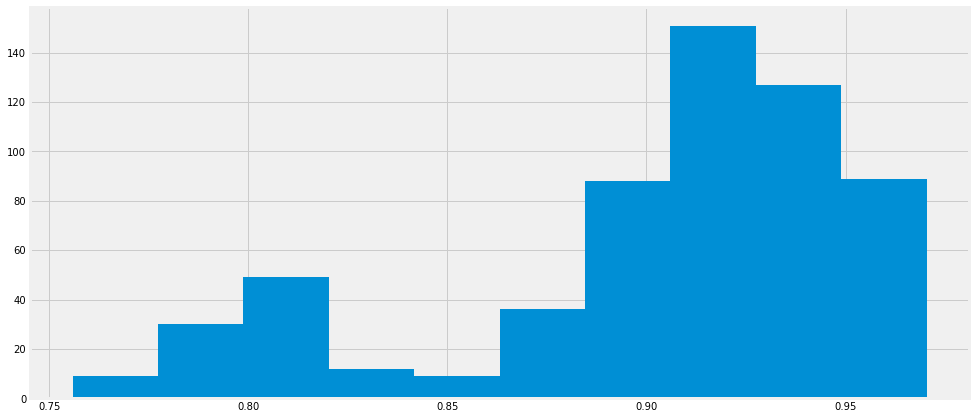

95.0 confidence interval 78.3% and 96.4%


In [101]:
# plot scores
plt.figure(figsize = (15, 7.2))
plt.hist(stats); plt.show()

# confidence intervals
alpha = 0.95 # for 95% confidence 
p = ((1.0 - alpha) / 2.0) * 100 # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  

p = (alpha + ((1.0 - alpha) / 2.0)) * 100
upper = min(1.0, np.percentile(stats, p))

print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

## Observation 10 - Conclusion
* **3 linear regressions (Linear, Lasso and Ridge) and decision tree-based regression methods such as Decision Tree, Random Forest, Bagging, AdaBoost, Gradient Boost and Extra Trees regressor** were executed. We also used **k-Fold cross validation, grid search and random search methods** to squeeze out the extra performance from the regressors. For some it resulted an improvement while for some it didn't owing to the limited hyperparameter space. For this specific problem, **Gradient Boost Regressor** turned out to be the best performing model when used with 5-fold cross validation and grid/random search with r2 for **training, validation and test as 5-Fold GradientBoost using RandomizedSearchCV 99.61%, 92.69%, 93.32% respectively**.
* Then we also Bootstrapping method to calculate confidence intervals for Gradient Boost Regressor. We found a 95% likelihood of r2 score between 78.3% and 96.4% for Gradient Boost Regressor.

In [102]:
display(df)

r2 Scores Train  r2 Scores Val  \
5-Fold LinearRegression                                 0.7473         0.7355   
5-Fold LassoRegression                                  0.7461         0.7351   
5-Fold RidgeRegression                                  0.7473         0.7355   
5-Fold DecisionTree                                     0.9962         0.7994   
5-Fold DecisionTree GridSearchCV                        0.9562         0.7877   
5-Fold DecisionTree RandomizedSearchCV                  0.9953         0.7915   
5-Fold RandomForest                                     0.9766         0.8815   
5-Fold RandomForest GridSearchCV                        0.9962         0.9029   
5-Fold RandomForest RandomizedSearchCV                  0.9653         0.8771   
5-Fold Bagging                                          0.9766         0.8858   
5-Fold Bagging using GridSearchCV                       0.9832         0.8968   
5-Fold Bagging using RandomizedSearchCV                 0.9832         0.8968   
5-Fold AdaBoost                                         0.8195         0.7645   
5-Fold AdaBoost using GridSearchCV                      0.9893         0.8907   
5-Fold AdaBoost using RandomizedSearchCV                0.9893         0.8907   
5-Fold GradientBoost                                    0.9499         0.8979   
5-Fold GradientBoost using GridSearchCV                 0.9961         0.9269   
5-Fold GradientBoost using RandomizedSearchCV           0.9961         0.9269   
5-Fold ExtraTrees                                       0.9962         0.8912   
5-Fold ExtraTrees using GridSearchCV                    0.9962         0.9050   
5-Fold ExtraTrees using RandomizedSearchCV              0.9962         0.9048   
5-Fold CatBoost                                         0.9745         0.9267   
5-Fold CatBoost GridSearchCV                            0.9774         0.9247   
5-Fold CatBoost RandomSearchCV                          0.9788         0.9264   

                                               r2 Scores Test  
5-Fold LinearRegression                                0.7170  
5-Fold LassoRegression                                 0.7154  
5-Fold RidgeRegression                                 0.7170  
5-Fold DecisionTree                                    0.8331  
5-Fold DecisionTree GridSearchCV                       0.7950  
5-Fold DecisionTree RandomizedSearchCV                 0.8103  
5-Fold RandomForest                                    0.8997  
5-Fold RandomForest GridSearchCV                       0.9124  
5-Fold RandomForest RandomizedSearchCV                 0.8906  
5-Fold Bagging                                         0.8999  
5-Fold Bagging using GridSearchCV                      0.9125  
5-Fold Bagging using RandomizedSearchCV                0.9125  
5-Fold AdaBoost                                        0.7993  
5-Fold AdaBoost using GridSearchCV                     0.8996  
5-Fold AdaBoost using RandomizedSearchCV               0.8996  
5-Fold GradientBoost                                   0.9102  
5-Fold GradientBoost using GridSearchCV                0.9332  
5-Fold GradientBoost using RandomizedSearchCV          0.9332  
5-Fold ExtraTrees                                      0.9061  
5-Fold ExtraTrees using GridSearchCV                   0.9156  
5-Fold ExtraTrees using RandomizedSearchCV             0.9154  
5-Fold CatBoost                                        0.9338  
5-Fold CatBoost GridSearchCV                           0.9311  
5-Fold CatBoost RandomSearchCV                         0.9364

# END OF PROJECT